# **Telcom customers churn**

# **Context**

The customer churn data for the telecommunications company presents details about an imaginary telco business operating in California during the third quarter. It encompasses data on 7,043 customers, revealing their status as departing, remaining, or newly joining the service. Additionally, the dataset comprises various significant demographic attributes for each customer, along with metrics such as Satisfaction Score, Churn Score, and Customer Lifetime Value (CLTV) index.

# **Objective**

**What is Churn Analysis ?**

Customer churn analysis is the process of using your churn data to understand :

* Which customers are leaving ?
* Why are they leaving ?
* What can you do to reduce churn ?

As you may have guessed, churn analysis goes beyond just looking at your customer churn rate. It’s about discovering the underlying causes behind your numbers.

Ultimately, successful churn analysis will give you the valuable insights you need to start reducing your business’s customer attrition rate.


**You, as a data scientist at the telco company, have been provided the the following dataset to :**

* **Analyze and build an ML model to help identify which customers are more likely to churn.**
* **Find the factors driving the customer churn process.**
* **Create a profile of the customers which are likely to churn.**

# **Data Description**

The data contains the different attributes of customers and their interaction details with the telco company. The detailed data dictionary is given below.


**Data Dictionary**

Variable | Description
-- | --
CustomerID | A unique ID that identifies each customer.
Gender | The customer’s gender: Male, Female
SeniorCitizen | Indicates if the customer is 65 or older: Yes, No
Married | Indicates if the customer is married: Yes, No
Dependents | Indicates if the customer lives with any dependents: Yes, No. Dependents   could be children, parents, grandparents, etc.
Tenure | Indicates the total amount of months that the customer has been with the   company by the end of the quarter specified above.
PhoneService | Indicates if the customer subscribes to home phone service with the   company: Yes, No
MultipleLines | Indicates if the customer subscribes to multiple telephone lines with the   company: Yes, No
InternetService | Indicates if the customer subscribes to Internet service with the   company: No, DSL, Fiber Optic, Cable.
OnlineSecurity | Indicates if the customer subscribes to an additional online security   service provided by the company: Yes, No
OnlineBackup | Indicates if the customer subscribes to an additional online backup   service provided by the company: Yes, No
DeviceProtection | Indicates if the customer subscribes to an additional device protection   plan for their Internet equipment provided by the company: Yes, No
TechSupport | Indicates if the customer subscribes to an additional technical support   plan from the company with reduced wait times: Yes, No
StreamingTV | Indicates if the customer uses their Internet service to stream   television programing from a third party provider: Yes, No. The company does   not charge an additional fee for this service.
StreamingMovies | Indicates if the customer uses their Internet service to stream movies   from a third party provider: Yes, No. The company does not charge an   additional fee for this service.
Contract | Indicates the customer’s current contract type: Month-to-Month, One Year,   Two Year.
PaperlessBilling | Indicates if the customer has chosen paperless billing: Yes, No
PaymentMethod | Indicates how the customer pays their bill: Bank Withdrawal, Credit Card,   Mailed Check
MonthlyCharges | Indicates the customer’s current total monthly charge for all their   services from the company.
TotalCharges | Indicates the customer’s total charges, calculated to the end of the   quarter specified above.
Churn | Yes = the customer left the company this quarter. No = the customer   remained with the company.

# **Importing libraries**

In [ ]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
from sklearn.preprocessing import MinMaxScaler

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
# Encode categorical features as a one-hot numeric array.
from sklearn.preprocessing import OneHotEncoder

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
# Encode target labels with value between 0 and n_classes-1.
# This transformer should be used to encode target values, i.e. y, and not the input X.
from sklearn.preprocessing import LabelEncoder

# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
# Univariate imputer for completing missing values with simple strategies.
# Replace missing values using a descriptive statistic (e.g. mean, median, or most frequent) along each column, or using a constant value.
from sklearn.impute import SimpleImputer


from sklearn import set_config
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import backend

# **Data Overview**

In [ ]:
# Let's mount the G. Drive in order to access to the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the dataset from csv file into a pandas df
df = pd.read_excel("/content/drive/MyDrive/Customer.xlsx")

In [ ]:
# Copy the data to another variable to avoid any changes to original data
data = df.copy()

In [ ]:
# Let's view the first 5 records from our dataset
data.head().T

,0,1,2,3,4
CustomerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
Gender,F,M,M,M,F
SeniorCitizen,No,No,No,No,No
Married,Yes,No,No,No,No
Dependents,No,No,No,No,No
Tenure,1.00000,34.00000,2.00000,NaN,2.00000
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,FTTX
OnlineSecurity,No,Yes,Yes,Yes,No


In [ ]:
data.shape

(7043, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Married           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7038 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7039 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Checking for missing values in the data
data.isnull().sum()

CustomerID           0
Gender               0
SeniorCitizen        0
Married              0
Dependents           0
Tenure               5
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             4
PaperlessBilling     0
PaymentMethod        4
MonthlyCharges       3
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# Checking unique values in each categorical column
data.select_dtypes('object').nunique()

CustomerID          7043
Gender                 2
SeniorCitizen          2
Married                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
Churn                  2
dtype: int64

In [ ]:
# Checking for duplicate values
data.duplicated().sum()

0

In [ ]:
# Dropping the columns
data = data.drop(['CustomerID'], axis=1)

# Creating numerical columns
num_cols = ['Tenure',	'MonthlyCharges',	'TotalCharges']

# Creating categorical variables
cat_cols = ['Gender',	'SeniorCitizen',	'Married',	'Dependents',	'PhoneService',	'MultipleLines',
            'InternetService',	'OnlineSecurity',	'OnlineBackup',	'DeviceProtection',	'TechSupport',
            'StreamingTV',	'StreamingMovies',	'Contract',	'PaperlessBilling',	'PaymentMethod']

## **Question (1)**

Update the bellow cell by providing your comments on following points

* Why CustomerID has been droped ?
* Why do we need to separate numerical & categorical variables ?
* Is there any issues with the dataset ? if yes what's the startegy to fix it ?

## **Response (1)**

**Observations**
* CustomerID has been droped : In general, we drop identifiers before building a predictive model, because the identifier doesn't give any meaningful information for the machine learning model. It doesn't contribute to predicting, and if we keep it as a feature, it could lead the model to overfitting. The solution in this case is to keep it as rows index.
* Separating numerical and categorical variables during pre-processing ensures that each type of variable is treated appropriately, to improve model performance and interpretability, and to avoid errors.The categorical variables will be converted into numerical format (using one-hot encoding, label encoding or target encoding), and Numerical variables might need scaling or normalization to ensure that they have similar scales.

* From what I've observed, there are a few problems with the data set that need to be resolved :



1.   Missing Values:

The columns "Tenure," "Contract," "PaymentMethod," "MonthlyCharges," and "TotalCharges" have missing values.
For numerical columns, we can decide to impute missing values using the mean or median of the column, or simply to drop rows containing missing values for both numerical or categorical columns, because in this case we have just a few missing values.

2.   Categorical Encoding:

We have some categorical variables in the dataset like "Gender" "SeniorCitizen" "Married" which have two or more unique values. So, we need to encode these categorical variables into numerical format using techniques such as one-hot encoding, label encoding or target encoding.

3.   Unbalanced target variable :

"Churn" is the target variable. If the distribution of "Churn" is highly unbalanced, this could affect the model's performance. We therefore need to resample the entire data set using either the oversampling method (minority class) or the undersampling method (majority class) to balance the data set.






# **Exploratory Data Analysis**

## **Univariate Analysis**

### Categorical variables

In [ ]:
data[cat_cols].describe().T

,count,unique,top,freq
Gender,7043,2,M,3555
SeniorCitizen,7043,2,No,5901
Married,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,FTTX,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [ ]:
for i in cat_cols :
  print(data[i].value_counts())

M    3555
F    3488
Name: Gender, dtype: int64
No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Married, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
FTTX    3096
DSL     2421
No      1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                    2707
No internet servic

In [ ]:
# Import pandas library
import pandas as pd

# Create a dictionary with the column names and their counts
column_counts = {
    "Gender": {"M": 3555, "F": 3488},
    "SeniorCitizen": {"No": 5901, "Yes": 1142},
    "Married": {"No": 3641, "Yes": 3402},
    "Dependents": {"No": 4933, "Yes": 2110},
    "PhoneService": {"Yes": 6361, "No": 682},
    "MultipleLines": {"No": 3390, "Yes": 2971, "No phone service": 682},
    "InternetService": {"FTTX": 3096, "DSL": 2421, "No": 1526},
    "OnlineSecurity": {"No": 3498, "Yes": 2019, "No internet service": 1526},
    "OnlineBackup": {"No": 3088, "Yes": 2429, "No internet service": 1526},
    "DeviceProtection": {"No": 3095, "Yes": 2422, "No internet service": 1526},
    "TechSupport": {"No": 3473, "Yes": 2044, "No internet service": 1526},
    "StreamingTV": {"No": 2810, "Yes": 2707, "No internet service": 1526},
    "StreamingMovies": {"No": 2785, "Yes": 2732, "No internet service": 1526},
    "Contract": {"month-to-month": 3874, "two-year": 1694, "one-year": 1471},
    "PaperlessBilling": {"Yes": 4171, "No": 2872},
    "PaymentMethod": {"electronic-check": 2364, "mailed-check": 1611, "bank-automatic-transfer": 1542, "automatic-credit-card": 1522}
}

# Create a DataFrame from the dictionary
percentage_df = pd.DataFrame.from_dict(column_counts, orient="index")

# Calculate percentages
total_entries = percentage_df.sum(axis=1)
percentage_df = (percentage_df / total_entries[:, None]) * 100

# Print the percentage DataFrame
print(percentage_df)

                        M        F       No      Yes  No phone service  \
Gender           50.47565 49.52435      NaN      NaN               NaN   
SeniorCitizen         NaN      NaN 83.78532 16.21468               NaN   
Married               NaN      NaN 51.69672 48.30328               NaN   
Dependents            NaN      NaN 70.04118 29.95882               NaN   
PhoneService          NaN      NaN  9.68337 90.31663               NaN   
MultipleLines         NaN      NaN 48.13290 42.18373           9.68337   
InternetService       NaN      NaN 21.66690      NaN               NaN   
OnlineSecurity        NaN      NaN 49.66634 28.66676               NaN   
OnlineBackup          NaN      NaN 43.84495 34.48814               NaN   
DeviceProtection      NaN      NaN 43.94434 34.38875               NaN   
TechSupport           NaN      NaN 49.31137 29.02172               NaN   
StreamingTV           NaN      NaN 39.89777 38.43533               NaN   
StreamingMovies       NaN      NaN 39.

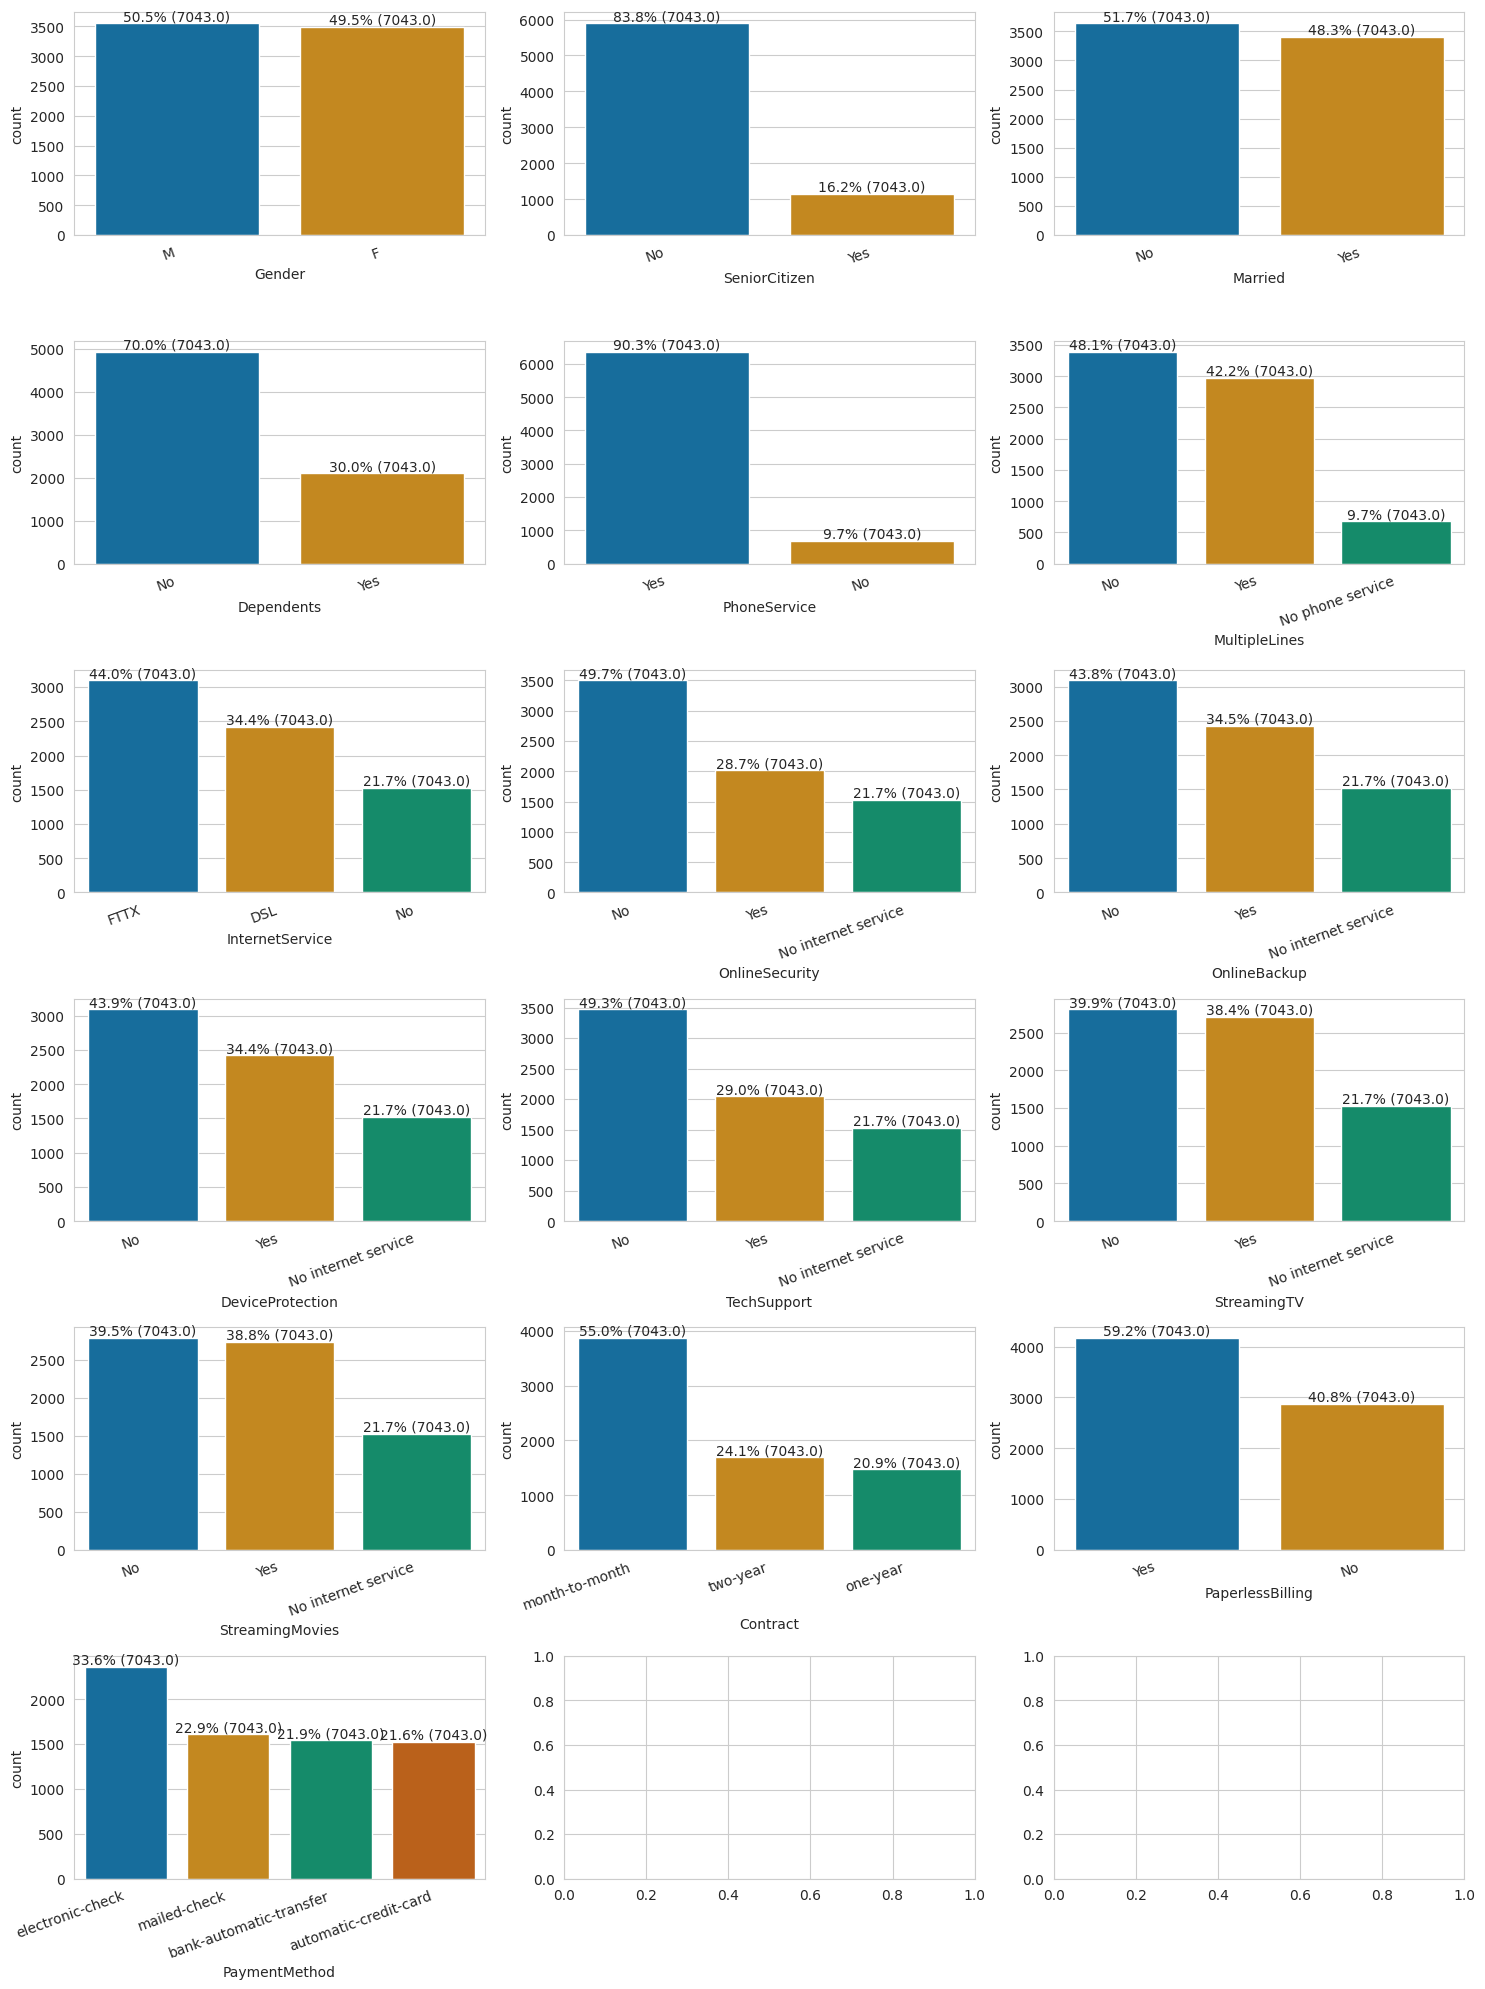

In [ ]:
sns.set_style('whitegrid')
# Let's plot the counplot for each categorical variable
# Sow each 3 variables in one line of the grid
cat_col = [
            ['Gender',	'SeniorCitizen',	'Married'],
            ['Dependents', 'PhoneService',	'MultipleLines'],
            ['InternetService',	'OnlineSecurity', 'OnlineBackup'],
            ['DeviceProtection',	'TechSupport', 'StreamingTV'],
            ['StreamingMovies',	'Contract',	'PaperlessBilling'],
            ['PaymentMethod']
           ]
fig, axes = plt.subplots(6, 3, figsize = (15, 20))
ax_i = 0
for i in cat_col:
  ax_j = 0
  for j in i:
    plot = sns.countplot(ax = axes[ax_i, ax_j], x = j, data = data, order = data[j].value_counts().index, palette='colorblind')
    plot.set_xticklabels(plot.get_xticklabels(), rotation=20, ha="right")
    for p in plot.patches:
      perc = '{:.1f}% ({:.1f})'.format(100 * p.get_height() / len(data[j]), len(data[j])) # Percentage of each class of the category
      x = p.get_x() + p.get_width() / 2  # Width of the plot
      y = p.get_height()                 # Height of the plot
      plot.annotate(perc, (x, y), ha = "center", va = "center", size = 10, xytext = (0, 5), textcoords = "offset points")        # Annotate the percentage
    # Move to the next position in the grid line
    ax_j = ax_j + 1
  # Move to the next line of the grid
  ax_i = ax_i + 1

# set the spacing between subplots
fig.tight_layout()
plt.show()

#### **Question (2)**

Update the bellow cell providing your observations on the distributuon of each categorical variable

#### **Response (2)**

**Observations**

* Gender:
There's a relatively balanced distribution between male and female customers.
which is consistent with the demographic distribution, because according to 2018 statistics, women represent 50.8, and almost 100% of people are subscribed to a telephone service and nowadays the majority have telephone service, so it seems consistent.

* SeniorCitizen:
The percentage of seniors ("Yes") is approximately 16.21%, which explains that 84% are under 65, and 16% are over. This aligns with the demographic statistics of 2018, on the one way that 15% of citizens in california represent the over 65s.

* Married  :
Marital status ("Married") is almost evenly distributed, with slightly more customers unmarried. (bearing in mind that in 2022 47% of the population will be married).

* Dependents
A higher percentage of customers have no dependents ("No").

* PhonesService & MultipleLines :
The majority of customers have a telephone service (approx. 90%), with 47% having a multiline service and 53% not having a single service.

* InternetService :
Internet service ("InternetService") is mainly fiber optic (FTTX) in the majority and DSL in the minority, with 22% having no Internet service ("No").

* Additional Services :
For additional services such as OnlineSecurity, and OnlineBackup the split is relatively even between customers who have the service ("Yes") and those who don't ("No").

* Streaming Services:
Similar patterns are observed for streaming services ("StreamingTV" and "StreamingMovies") with an even distribution between "Yes" and "No."

* Contract and PaymentMethod:
The majority of customers have a month-to-month contract ("Contract").
The most common payment method ("PaymentMethod") is "electronic-check," followed by "mailed-check," "bank-automatic-transfer," and "automatic-credit-card."

### Continuous variables

In [ ]:
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,7038.00000,32.35209,24.55601,0.00000,9.00000,29.00000,55.00000,72.00000
MonthlyCharges,7040.00000,64.75424,30.08724,18.25000,35.50000,70.35000,89.85000,118.75000
TotalCharges,7032.00000,2283.30044,2266.77136,18.80000,401.45000,1397.47500,3794.73750,8684.80000


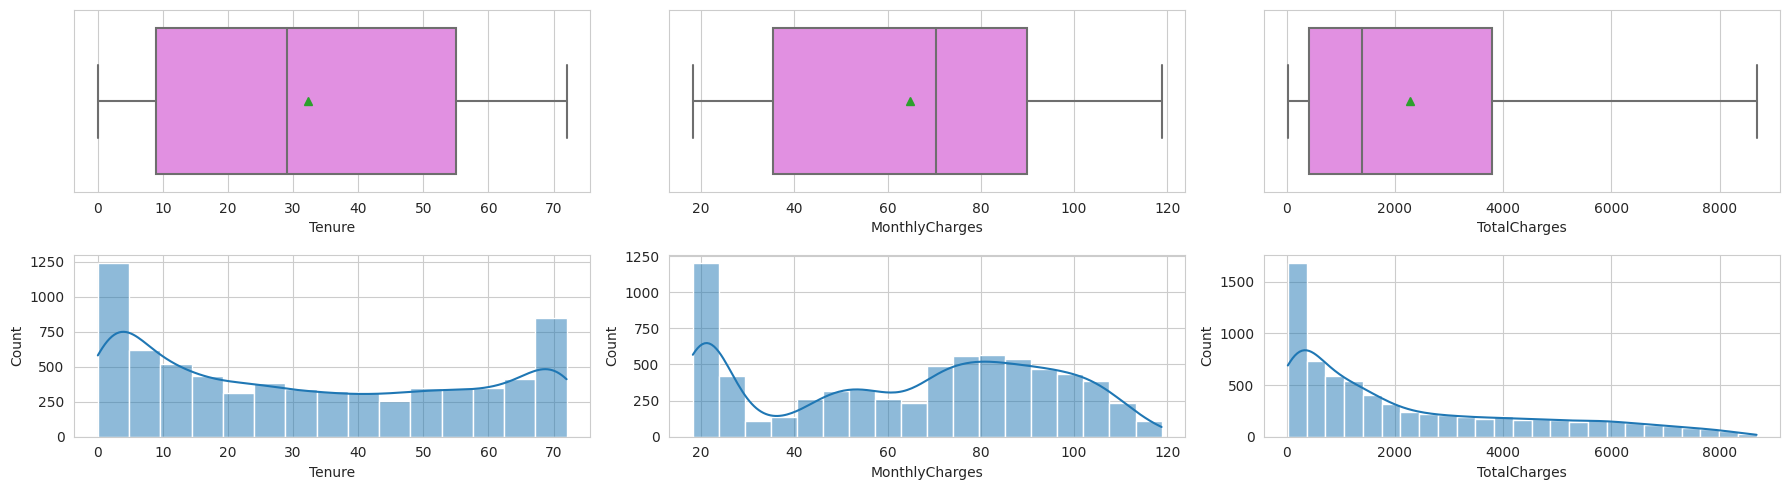

In [ ]:
# Plot the boxplot and historgramme for each numerical variable
fig, axes = plt.subplots(2, 3, figsize = (18, 5))
ax = 0
for i in num_cols:
  sns.boxplot(data=data, x=i, ax=axes[0, ax], showmeans = True, color = "violet")
  sns.histplot(data=data, x=i, kde = True, ax = axes[1, ax], palette = "winter")
  # Move to the next position in the same line of the grid
  ax = ax + 1
# set the spacing between subplots
fig.tight_layout()
plt.show()

#### **Question (3)**

Update the bellow cell providing your observations on the distributuon of each numerical variable

#### **Response (3)**

**Observations**

The box plots show the median, quartiles, and outliers of the data for each column.
Here’s a brief description:

* Tenure: The box plot shows that the median tenure is around 30 months, with a range of 0 to 72 months. There are no outliers in this column.
* MonthlyCharges: The box plot shows that the median monthly charge is around 70 dollar, with a range of 0 to 118 dollar. There are no outliers in this column.
* TotalCharges: The box plot shows that the median total charge is around 1400 dollar, with a range of 0 to 6000 dollar. There are no outliers in this column.

The histograms show the frequency distribution of the data for each column.
Here’s a brief description:

* Tenure : The histogram shows a peak in the number of customers who have been with the company for 5 months or less, and the frequency decreases after 5 and 10 months, reaching a 2nd low peak at 70 months.
* MonthlyCharges: The histogram shows that most customers pay between 20 and 30 dollar per month. There is a lower frequency peak around 80 dollar per month.
* TotalCharges: The histogram shows that most customers have total charges between 0 and 1000 dollar.

## **Bivariate Analysis**

### Categorical variables

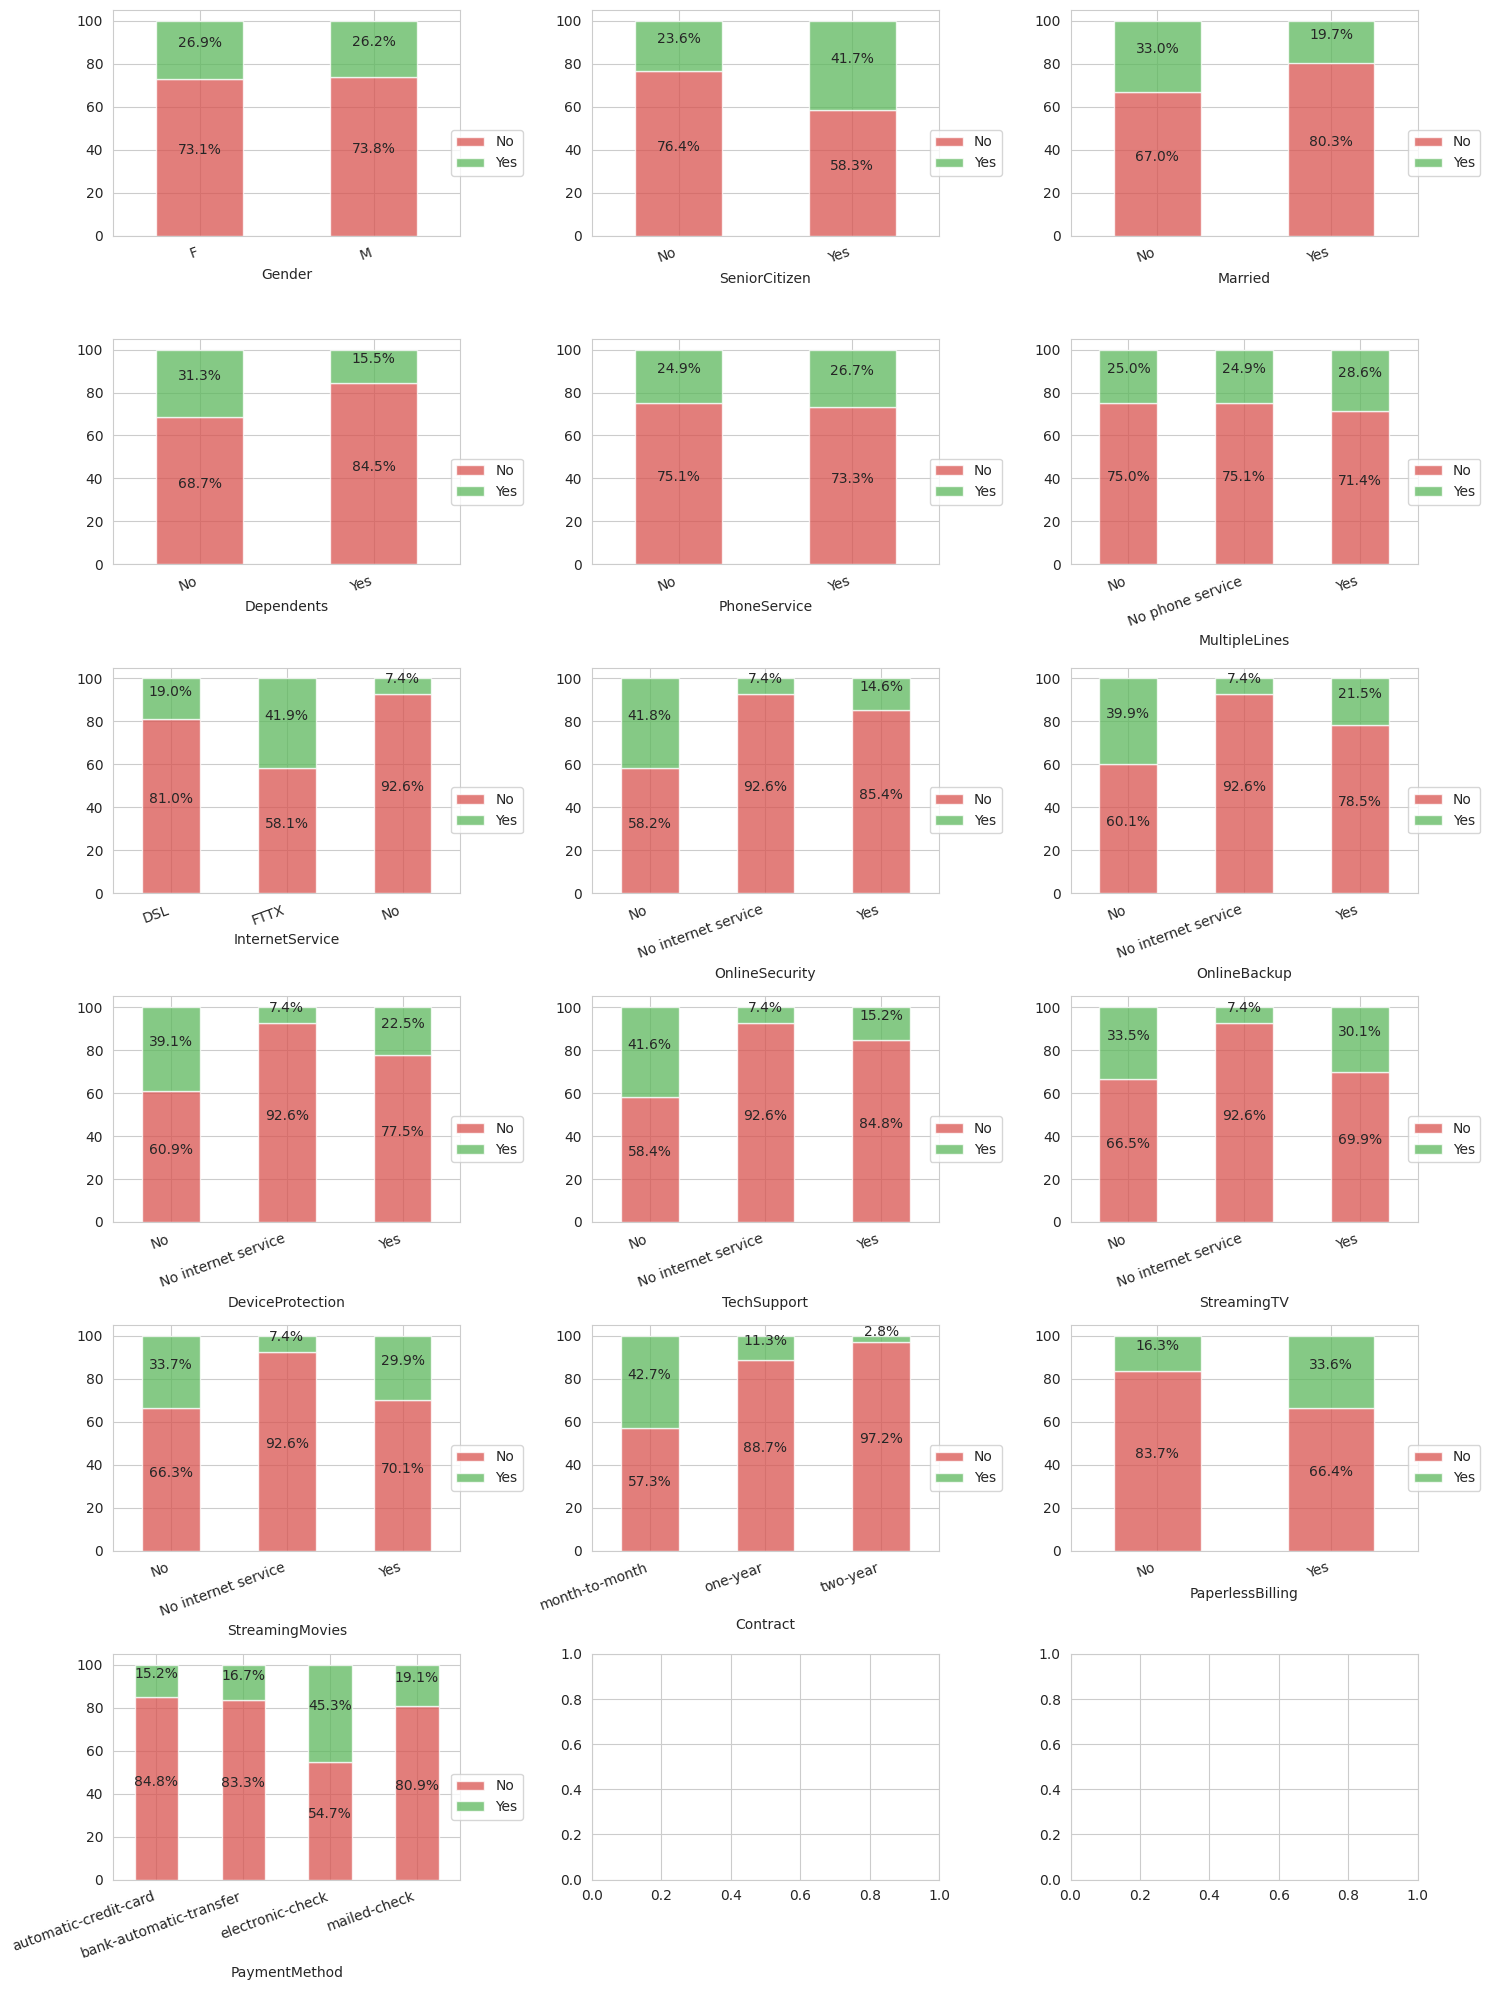

In [ ]:
sns.set_style('whitegrid')
# Let's plot a barplot for each categorical variable showing how it participates in the conversion of leads
# Sow each 3 variables in one line of the grid
cat_col = [
            ['Gender',	'SeniorCitizen',	'Married'],
            ['Dependents', 'PhoneService',	'MultipleLines'],
            ['InternetService',	'OnlineSecurity', 'OnlineBackup'],
            ['DeviceProtection',	'TechSupport', 'StreamingTV'],
            ['StreamingMovies',	'Contract',	'PaperlessBilling'],
            ['PaymentMethod']
           ]
fig, axes = plt.subplots(6, 3, figsize = (15, 20))
ax_i = 0
for i in cat_col:
  ax_j = 0
  for j in i:
    plot = (pd.crosstab(data[j], data['Churn'], normalize='index') * 100).plot(kind='bar', stacked=True, ax=axes[ax_i, ax_j], alpha=0.75, rot=0, colormap='Paired', color=['#d9534f', '#5cb85c'])
    plot.set_xticklabels(plot.get_xticklabels(), rotation=20, ha="right")
    patches, labels = plot.get_legend_handles_labels()
    plot.legend(patches, labels, bbox_to_anchor=(1.2, 0.5))
    for p in plot.patches:
      perc = '{:.1f}%'.format(p.get_height()) # Percentage of each class of the category
      x = p.get_x() + p.get_width() / 2   # Width of the plot
      y = p.get_y() + p.get_height() / 2  # Height of the plot
      plot.annotate(perc, (x, y), ha = "center", va = "center", size = 10, xytext = (0, 5), textcoords = "offset points")        # Annotate the percentage
    # Move to the next position in the grid line
    ax_j = ax_j + 1
  # Move to the next line of the grid
  ax_i = ax_i + 1


# set the spacing between subplots
fig.tight_layout()
plt.show()

#### **Question (4)**

Update the bellow cell providing your observations on how each numerical variable categorical to the churn of customers

#### **Response (4)**

**Observations**
* SeniorCitizen : The churn rate among seniors is almost twice that of the younger population.
* Mirried & Dependents : Married customers and customers living with dependents are twice as loyal as those who are neither married nor living with dependents.
* PhoneService & MultipleLines : Whether or not the customer subscribes to a telephone service, or subscribes to several lines, has no impact on the churn rate.
* InternetSrvice : Customers with fiber optic internet service (FTTX) have a higher churn rate than those with DSL or no service.
* Additional Services : "OnlineSecurity", "OnlineBackup" , "DeviceProtection", "TechSupport", "StreamingTV" and "StreamingMovies". Customers who don't have these services tend to leave more often than those who do. On average we have 40% of customers.
* Contract : Monthly-paying customers have a higher churn rate than annual-paying customers (1 year or 2 years).
* PaperlessBilling : Customers with paper invoices have a churn rate 2 times higher than those without.
* PaymentMethod  : Customers paying by electronic-check have a churn rate 2 to 3 times higher than others.

### Continuous variables

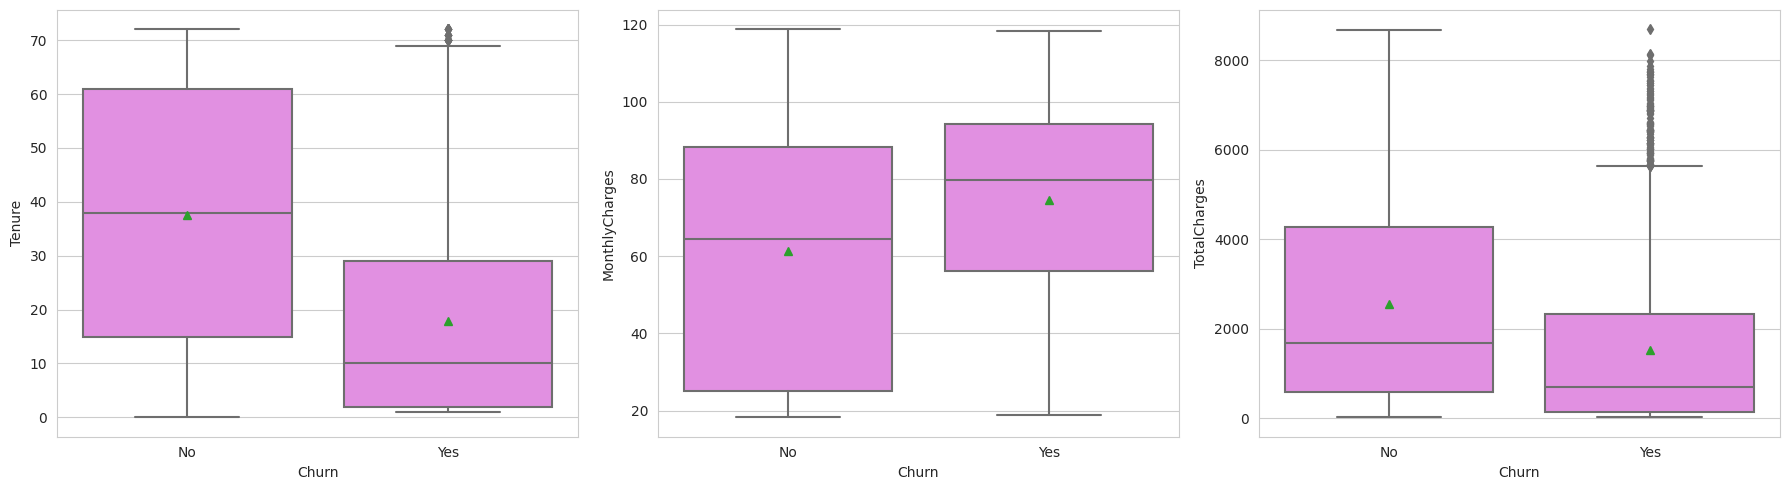

In [ ]:
# Plot the boxplot for each numerical variable with the split of status
fig, axes = plt.subplots(1, 3, figsize = (18, 5))
ax = 0
for i in num_cols:
  sns.boxplot(data=data, x='Churn', y=i, ax=axes[ax], showmeans=True, color="violet")
  # Move to the next position in the same line of the grid
  ax = ax + 1
# set the spacing between subplots
fig.tight_layout()
plt.show()

#### **Question (5)**

Update the bellow cell providing your observations on how each numerical variable contribute to the churn of customers

#### **Response (5)**

**Observations**

* Tenure : new customers are more likely to unsubscribe than older ones.
* MonthlyCharges : customers with higher monthly charges are more likely to churn.
* TotalCharges : in this case, the opposite is true: customers with average quarterly charges tend to churn. These are probably customers with fewer subscription services.

## **Multivariate Analysis**

<Axes: >

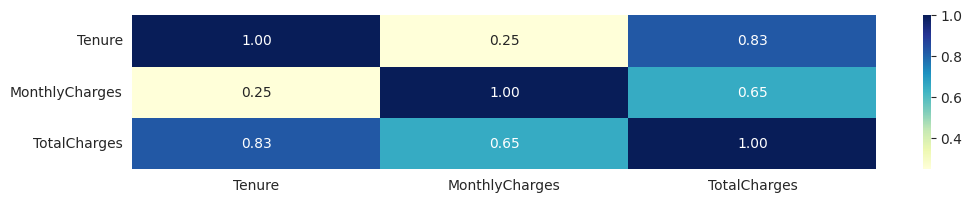

In [ ]:
# Plotting the correlation between numerical variables
plt.figure(figsize=(12, 2))
sns.heatmap(data[num_cols].corr(), annot=True, fmt='0.2f', cmap='YlGnBu')

#### **Question (6)**

Update the bellow cell providing your observations on the correlation matrix

#### **Response (6)**

* Tenure & MonthlyCharges :

The correlation coefficient between "Tenure" and "MonthlyCharges" is 0.25 (positive), indicating a weak correlation.
This indicates a slight tendency for customers with longer tenure to have slightly higher monthly charges.

* Tenure & TotalCharges :

The correlation coefficient between "Tenure" and "TotalCharges" is 0.83 (positive), indicating a strong correlation.
This indicates that as a customer's tenure increases, so do his total expenses.

* MonthlyCharges & TotalCharges:

The correlation coefficient between "MonthlyCharges" and "TotalCharges" is 0.65 (positive), indicating a moderate correlation.
We can say that if a customer's monthly charges increase, his total charges over the specified period also tend to rise a little.

In [ ]:
num_cols

['Tenure', 'MonthlyCharges', 'TotalCharges']

<span style="color:#ff5f27;"> 👾 Uncomment and update the following cell code if required </span>

In [ ]:
# Columns to be droped if required ( Tenure or TotalCharges )
col_drop = ['TotalCharges']
data.drop(col_drop, axis=1, inplace=True)

# **Data Preprocessing**

## **Splitting the Data**

<span style="color:#ff5f27;"> 👾 Uncomment and update the following cell code if required </span>

In [ ]:
data['Churn'] = np.where(data['Churn'] == 'Yes', 1, 0)
data['Churn'] = data['Churn'].astype(int)


**Separating the independent variables (X) and the dependent variable (Y)**

In [ ]:
## Separating Independent and Dependent Columns
X = data.drop(['Churn'], axis=1)
Y = data[['Churn']]

In [ ]:
Y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


**Splitting the data into 70% train and 30% test set**

In [ ]:
# Splitting the dataset into the Training and Testing set.
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42, stratify = Y)

## **Transforming the dataset**

In [ ]:
X_train.isnull().sum()

Gender              0
SeniorCitizen       0
Married             0
Dependents          0
Tenure              3
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       2
MonthlyCharges      3
dtype: int64

In [ ]:
X_test.isnull().sum()

Gender              0
SeniorCitizen       0
Married             0
Dependents          0
Tenure              2
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            4
PaperlessBilling    0
PaymentMethod       2
MonthlyCharges      0
dtype: int64

**Missing Value Imputation** : As you can see we have some variables with missing values :
* Tenure
* MonthlyCharges
* Contract
* PaperlessBilling
* PaymentMethod

We Will impute the missing values in columns using :
* their **mode** for categorical variables
* their **mean** for continuous variables

### **Question (7)**

* Create the required python code for the missing values imputation applied to continuous & categorical variables.
* Explain reasons behind applying these transformations after the data splitting ?

**The reasons for applying imputation after data splitting:**

* Preventing data leakage : Imputing missing values using information from the entire dataset including the testing set can lead to data leakage because the testing set should not influence the training process.

* Avoiding overfitting : This reduces the risk of overfitting, where the model learns to perform well on the specific training data but generalizes poorly to new data.

In [ ]:
imputer_mode = SimpleImputer(strategy="most_frequent")
imputer_mean = SimpleImputer(strategy="mean")

In [ ]:
# Provide code here for Question (7)

###-- Missing Value Imputation --###

## categorical columns ##
categorical_columns = ["Contract", "PaperlessBilling", "PaymentMethod"]
X_train[categorical_columns] = imputer_mode.fit_transform(X_train[categorical_columns])
X_test[categorical_columns] = imputer_mode.transform(X_test[categorical_columns])


## continuous columns ##
continuous_columns = ["Tenure", "MonthlyCharges"]

X_train[continuous_columns] = imputer_mean.fit_transform(X_train[continuous_columns])
X_test[continuous_columns] = imputer_mean.transform(X_test[continuous_columns])



In [ ]:
X_train.isnull().sum()

Gender              0
SeniorCitizen       0
Married             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
dtype: int64

In [ ]:
X_test.isnull().sum()

Gender              0
SeniorCitizen       0
Married             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
dtype: int64

Often in machine learning, we want to convert categorical variables into some type of numeric format that can be readily used by algorithms.

There are two common ways to convert categorical variables into numeric variables:

1. Label Encoding: Assign each categorical value an integer value based on alphabetical order.

2. One Hot Encoding: Create new variables that take on values 0 and 1 to represent the original categorical values. When using this approach, we create one new column for each unique value in the original categorical variable.

In [ ]:
# Printing the % sub categories of each category
for i in cat_cols:
    print(data[i].value_counts(normalize=True) * 100)
    print('*' * 40)
    print()

M   50.47565
F   49.52435
Name: Gender, dtype: float64
****************************************

No    83.78532
Yes   16.21468
Name: SeniorCitizen, dtype: float64
****************************************

No    51.69672
Yes   48.30328
Name: Married, dtype: float64
****************************************

No    70.04118
Yes   29.95882
Name: Dependents, dtype: float64
****************************************

Yes   90.31663
No     9.68337
Name: PhoneService, dtype: float64
****************************************

No                 48.13290
Yes                42.18373
No phone service    9.68337
Name: MultipleLines, dtype: float64
****************************************

FTTX   43.95854
DSL    34.37456
No     21.66690
Name: InternetService, dtype: float64
****************************************

No                    49.66634
Yes                   28.66676
No internet service   21.66690
Name: OnlineSecurity, dtype: float64
****************************************

No                 

### **Question (8)**

In [ ]:
col_encoded = ['SeniorCitizen', 'Married', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
               'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

* Analyse variables from list `col_encoded` and argument what strategy you will use to encode them.
* Create the required python code for encoding all variables from list `col_encoded`

In [ ]:
# Provide code here for Question (8)

## Encoding categorical columns ##

# Apply binary encoding to variables with two categories #
binary_columns = ['SeniorCitizen', 'Married', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_columns:
    X_train[col] = X_train[col].map({"No": 0, "Yes": 1})
    X_test[col] = X_test[col].map({"No": 0, "Yes": 1})

# Apply one-hot encoding to variables with more than two categories #
onehot_columns = list(set(col_encoded) - set(binary_columns))
X_train = pd.get_dummies(X_train, columns= onehot_columns)
X_test = pd.get_dummies(X_test, columns= onehot_columns)

#X_train = pd.get_dummies(X_train, columns= onehot_columns, drop_first=True)


* Binary Encoding:

Variables with two categories ("SeniorCitizen," "Married," "Dependents," "PhoneService," "PaperlessBilling"), they have relatively balanced distribution.
The encode as 0 and 1, considering 1 for the category that represents a positive or desired outcome.

* One-Hot Encoding:

Variables with more than two categories and no clear ordinal relationship ("MultipleLines," "InternetService," "OnlineSecurity," "OnlineBackup," "DeviceProtection," "TechSupport," "StreamingTV," "StreamingMovies," "PaymentMethod").
Encode each category as a separate binary column (dummy variables).

* Create a new variable called `IsFemale` that will replace the variable `Gender`


In [ ]:
# Provide code here for Question (8)

# Create a new column 'IsFemale' #
X_train['IsFemale'] = np.where(X_train['Gender']  == 'F', 1, 0)
X_test['IsFemale'] = np.where(X_test['Gender']  == 'F', 1, 0)

# Drop column 'Gender' #
X_train.drop('Gender', axis=1, inplace=True)
X_test.drop('Gender', axis=1, inplace=True)

In [ ]:
X_train.head().T

,5557,2270,6930,2257,898
SeniorCitizen,0,1,0,0,0
Married,0,0,1,0,0
Dependents,0,0,0,0,0
Tenure,5.00000,3.00000,3.00000,60.00000,12.00000
PhoneService,1,1,1,1,1
Contract,month-to-month,month-to-month,month-to-month,one-year,month-to-month
PaperlessBilling,0,1,1,0,1
PaymentMethod,electronic-check,electronic-check,automatic-credit-card,automatic-credit-card,bank-automatic-transfer
MonthlyCharges,80.20000,86.85000,75.15000,80.55000,98.90000
InternetService_DSL,0,0,0,1,0


In [ ]:
X_test.head().T

,4994,6828,755,404,981
SeniorCitizen,0,0,1,0,0
Married,0,1,0,0,1
Dependents,0,1,0,0,1
Tenure,18.00000,8.00000,20.00000,20.00000,40.00000
PhoneService,1,1,1,1,1
Contract,month-to-month,two-year,month-to-month,two-year,two-year
PaperlessBilling,1,0,1,1,0
PaymentMethod,electronic-check,mailed-check,electronic-check,mailed-check,mailed-check
MonthlyCharges,96.05000,19.05000,98.55000,19.70000,19.60000
InternetService_DSL,0,0,0,0,0


### **Question (9)**

In [ ]:
col_encoded = ['PaymentMethod', 'Contract']

In [ ]:
X_train.groupby('Contract').size()

Contract
month-to-month    2704
one-year          1034
two-year          1192
dtype: int64

* Analyse variables from list `col_encoded` and argument what strategy you will use to encode them.
* Create the required python code for encoding all variables from list `col_encoded`

In [ ]:
# Provide code here for Question (9)

# Apply one-hot encoding to 'PaymentMethod' #
X_train = pd.get_dummies(X_train, columns=['PaymentMethod'], prefix=['Payment'])
X_test = pd.get_dummies(X_test, columns=['PaymentMethod'], prefix=['Payment'])

# Apply ordinal encoding to 'Contract' #
contract_mapping = {'month-to-month': 1, 'one-year': 2, 'two-year': 3}
X_train['Contract'] = X_train['Contract'].map(contract_mapping)
X_test['Contract'] = X_test['Contract'].map(contract_mapping)

* PaymentMethod:

This variable has more than two modalities. Therefore, we should use one-hot encoding to represent each category separately.

* Contract:

This variable represents an ordinal relationship between categories ( we have "month-to-month" then "one-year" then "two-year"). Therefore, we can apply ordinal encoding to capture this order.

In [ ]:
X_train.head().T

,5557,2270,6930,2257,898
SeniorCitizen,0.00000,1.00000,0.00000,0.00000,0.00000
Married,0.00000,0.00000,1.00000,0.00000,0.00000
Dependents,0.00000,0.00000,0.00000,0.00000,0.00000
Tenure,5.00000,3.00000,3.00000,60.00000,12.00000
PhoneService,1.00000,1.00000,1.00000,1.00000,1.00000
Contract,1.00000,1.00000,1.00000,2.00000,1.00000
PaperlessBilling,0.00000,1.00000,1.00000,0.00000,1.00000
MonthlyCharges,80.20000,86.85000,75.15000,80.55000,98.90000
InternetService_DSL,0.00000,0.00000,0.00000,1.00000,0.00000
InternetService_FTTX,1.00000,1.00000,1.00000,0.00000,1.00000


In [ ]:
X_test.head().T

,4994,6828,755,404,981
SeniorCitizen,0.00000,0.00000,1.00000,0.00000,0.00000
Married,0.00000,1.00000,0.00000,0.00000,1.00000
Dependents,0.00000,1.00000,0.00000,0.00000,1.00000
Tenure,18.00000,8.00000,20.00000,20.00000,40.00000
PhoneService,1.00000,1.00000,1.00000,1.00000,1.00000
Contract,1.00000,3.00000,1.00000,3.00000,3.00000
PaperlessBilling,1.00000,0.00000,1.00000,1.00000,0.00000
MonthlyCharges,96.05000,19.05000,98.55000,19.70000,19.60000
InternetService_DSL,0.00000,0.00000,0.00000,0.00000,0.00000
InternetService_FTTX,1.00000,0.00000,1.00000,0.00000,0.00000


# **Model Evaluation Criterion**

The model will make a number of mistakes.
It will predicts some correctly and few incorrectly. For example, it will marks some of the customers who will churn as not churn and also will marks some of the customers who will not churn as someone who will churn.

The goal for the telco company is to engage and talk to the customers to prevent them from churning, its ok to engage with those who are mistakenly tagged as "not churned" as it does not cause any negative problem. It could potentially make them even happier for the extra love they are getting. This is the kind of model that can add value from day one.

Let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.

In [ ]:
# Creating metric function
def metrics_score(actual, predicted):
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.htm
    print(classification_report(actual, predicted, target_names=['Not Churn (0)', 'Churn (1)'], digits=4))

    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
    cm = confusion_matrix(actual, predicted)
    tn, fp, fn, tp = cm.ravel()
    group_names = ['TN', 'FP', 'FN', 'TP']
    group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1} ({v2}) ({v3})' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize=(6, 3))
    sns.heatmap(cm, annot=labels,  fmt='', xticklabels=['Not Churn (0)', 'Churn (1)'], yticklabels=['Not Churn (0)', 'Churn (1)'], cmap='Blues')
    plt.ylabel('Actual classes')
    plt.xlabel('Predicted classes')
    plt.show()

# **Decision Tree**

In [ ]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight={0: 0.27, 1: 0.73}, random_state=1)

In [ ]:
# Fitting decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.27, 1: 0.73}, random_state=1)

**Let's check the model performance of decision tree**

               precision    recall  f1-score   support

Not Churn (0)     0.9997    0.9970    0.9983      3622
    Churn (1)     0.9917    0.9992    0.9954      1308

     accuracy                         0.9976      4930
    macro avg     0.9957    0.9981    0.9969      4930
 weighted avg     0.9976    0.9976    0.9976      4930



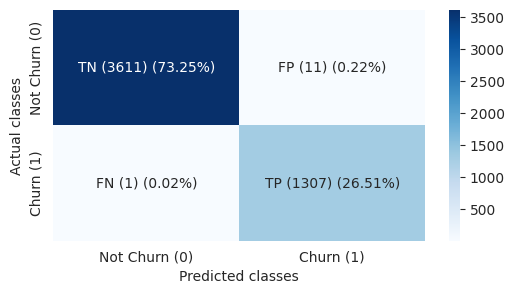

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(X_train)
metrics_score(y_train, y_train_pred_dt)

               precision    recall  f1-score   support

Not Churn (0)     0.8124    0.8093    0.8108      1552
    Churn (1)     0.4780    0.4831    0.4805       561

     accuracy                         0.7227      2113
    macro avg     0.6452    0.6462    0.6457      2113
 weighted avg     0.7236    0.7227    0.7231      2113



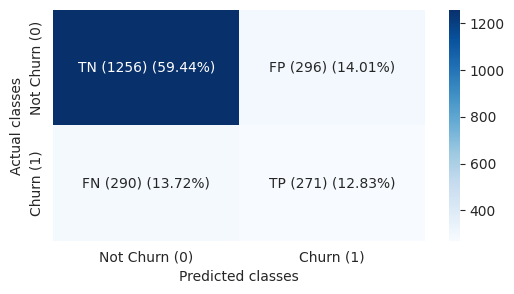

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(X_test)
metrics_score(y_test, y_test_pred_dt)

#### **Question (10)**

Update the bellow cell providing your observations on the model performance

#### **Response (10)**

**Observations**

* The train data set:

Accuracy on the training data set is very high, and the confusion matrix shows a very low number of false positives ( 0.2%) and a single false negative ( 0.02% ), indicating that the model performs very well in terms of predictions.

* The test data set:

Accuracy on the test dataset is lower than on the training dataset, but still reasonable.
The confusion matrix for the test dataset shows a higher number of false positives ( 15% ) and false negatives ( 14% ) compared to the training dataset. This suggests that the model may be struggling to classify some customers correctly.

--> An accuracy of 99% on the training dataset and 71% on the test dataset suggests that the model may be overfitting to the training data. It is possible that class imbalance and decision tree complexity contribute to overfitting and lower performance on the test dataset and very high performance on train set.


**Let's plot the feature importance and check the most important features.**

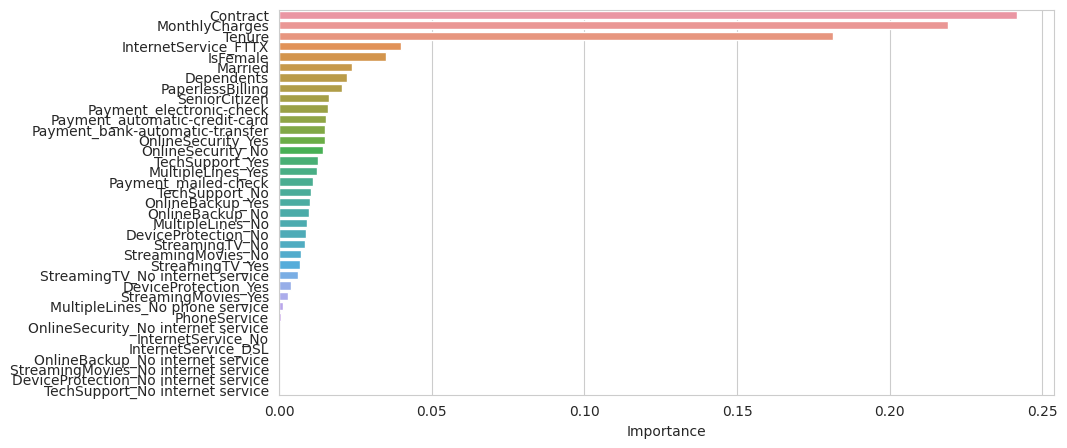

In [ ]:
# Plot the feature importance
importances = dt.feature_importances_
columns = X_train.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (10, 5))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)
plt.show()

#### **Question (11)**

Update the bellow cell providing your observations on features importance

#### **Response (11)**

**Observations**
*  The Contract, MonthlyCharges, and Tenure columns are the ones on which the model relies most to predict results. However, this reliance can lead to overfitting. The features of the dataset are not scaled, which can cause some features to dominate others and influence the model, leading to overfitting.

**Let's plot the tree** and check:

As we know the decision tree keeps growing until the nodes are homogeneous, i.e., it has only one class, and the dataset here has a lot of features, it would be hard to visualize the whole tree with so many features. Therefore, we are only visualizing the tree up to **max_depth = 4**.

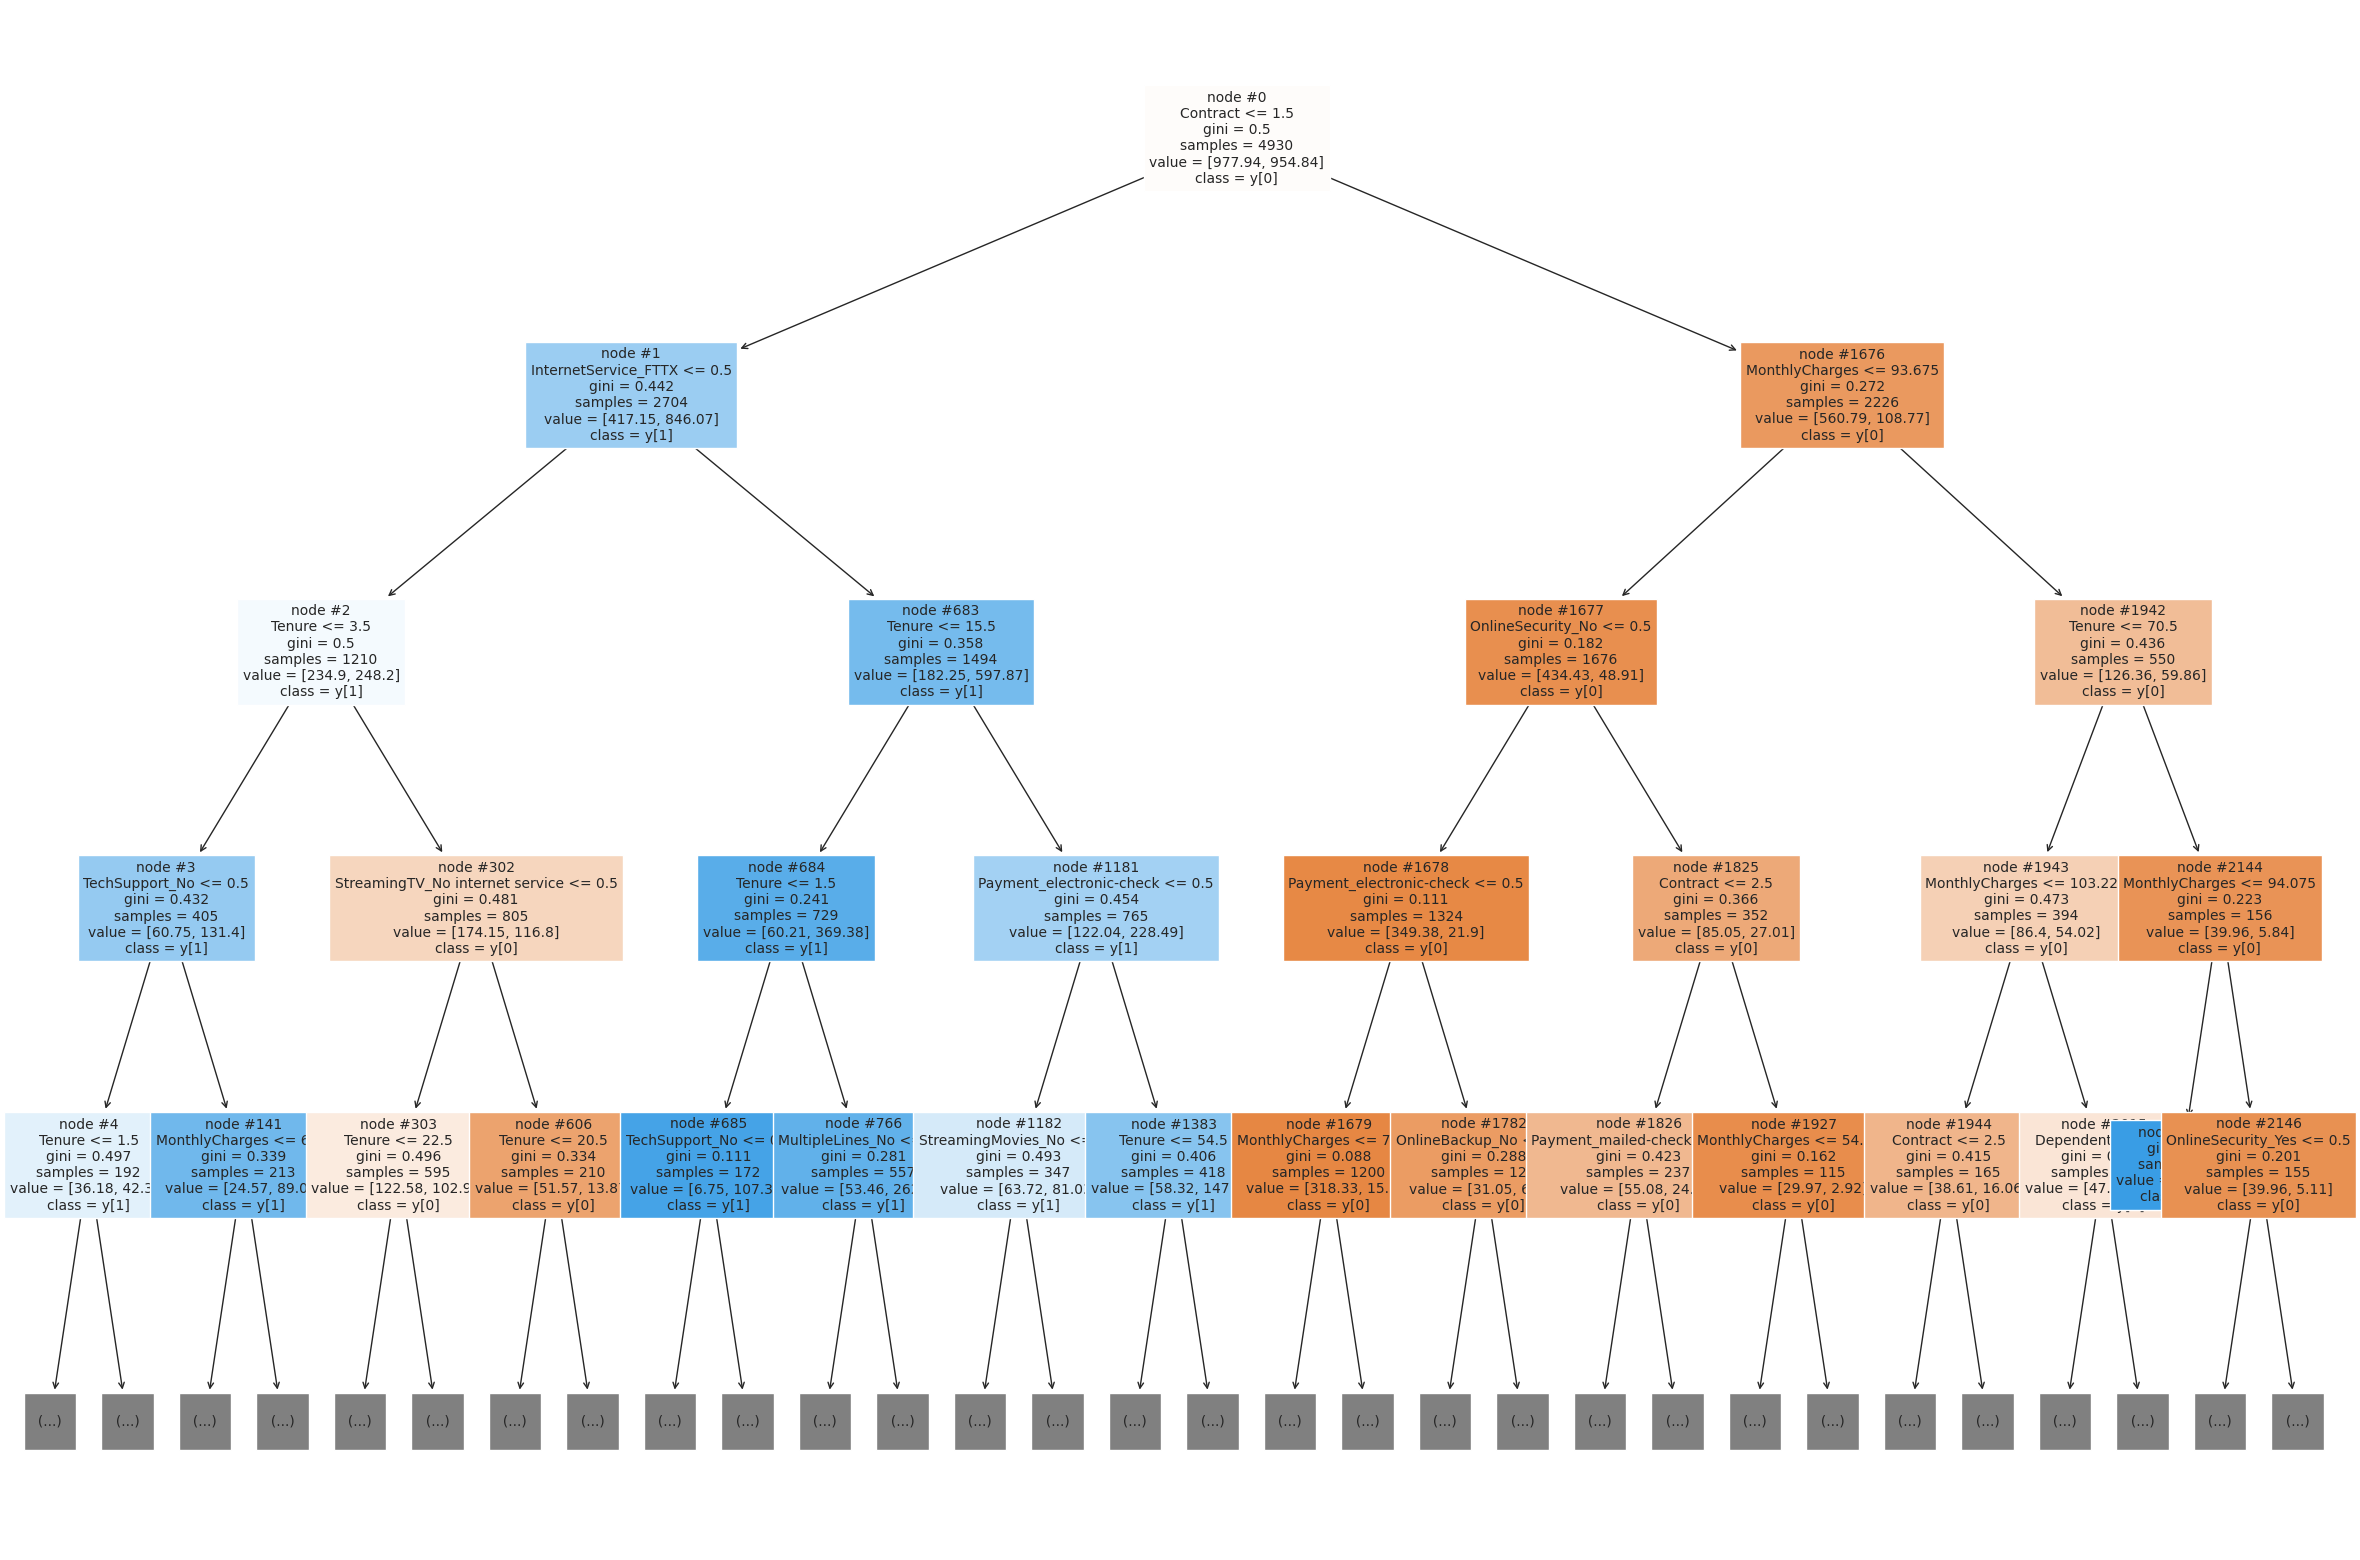

In [ ]:
features = list(X_train.columns)
plt.figure(figsize = (30, 20))
tree.plot_tree(dt, max_depth=4, feature_names=features, filled=True, fontsize=10, node_ids=True, class_names=True)
plt.show()

#### **Question (12)**

Update the bellow cell providing your observations on the tree

#### **Response (12)**

**Observations**
* This decision tree diagram shows Gini indices. These are measures of a node's impurity or randomness.
Gini indices can be observed on nodes, those with lower valuers are considered purer, meaning they have a higher concentration of a single class, and this is not the case for the Contract and Tenure column.
This tree just confirms the observations above.

Let's try to fine tune one hyperparameter `max_depth` and see the results

In [ ]:
# Choose the type of classifier
dt_tunned = DecisionTreeClassifier(random_state=1, class_weight={0: 0.27, 1: 0.73}, criterion='entropy', max_depth=5)
# Fit the best algorithm to the data
dt_tunned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.27, 1: 0.73}, criterion='entropy',
                       max_depth=5, random_state=1)

               precision    recall  f1-score   support

Not Churn (0)     0.9256    0.6938    0.7931      3622
    Churn (1)     0.4993    0.8456    0.6279      1308

     accuracy                         0.7341      4930
    macro avg     0.7125    0.7697    0.7105      4930
 weighted avg     0.8125    0.7341    0.7493      4930



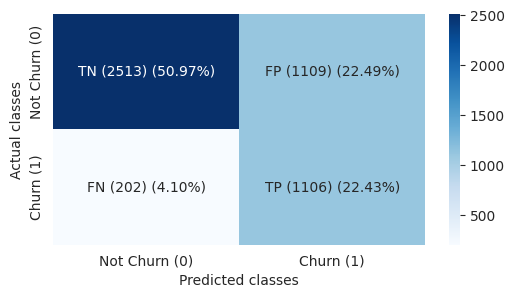

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = dt_tunned.predict(X_train)
metrics_score(y_train, y_train_pred_dt)

               precision    recall  f1-score   support

Not Churn (0)     0.9051    0.6759    0.7739      1552
    Churn (1)     0.4727    0.8039    0.5954       561

     accuracy                         0.7099      2113
    macro avg     0.6889    0.7399    0.6846      2113
 weighted avg     0.7903    0.7099    0.7265      2113



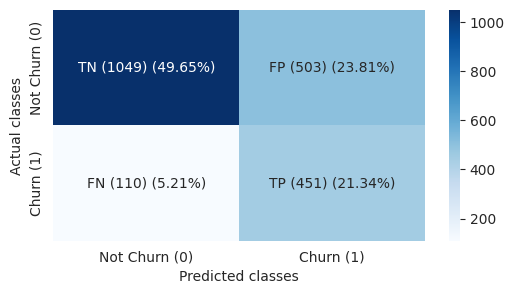

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = dt_tunned.predict(X_test)
metrics_score(y_test, y_test_pred_dt)

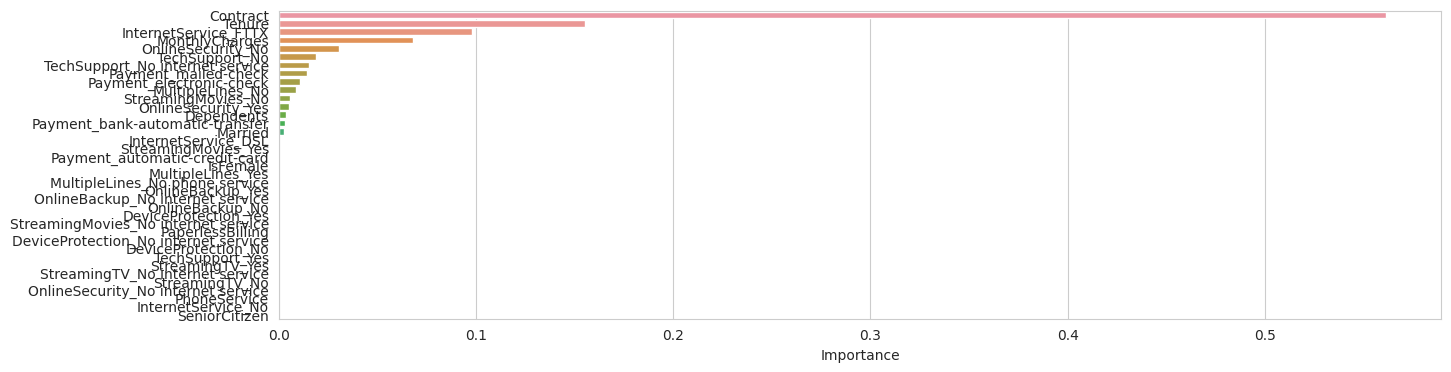

In [ ]:
# Plot the feature importance of the tunned model
importances = dt_tunned.feature_importances_
columns = X_train.columns
importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
plt.figure(figsize = (15, 4))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)
plt.show()

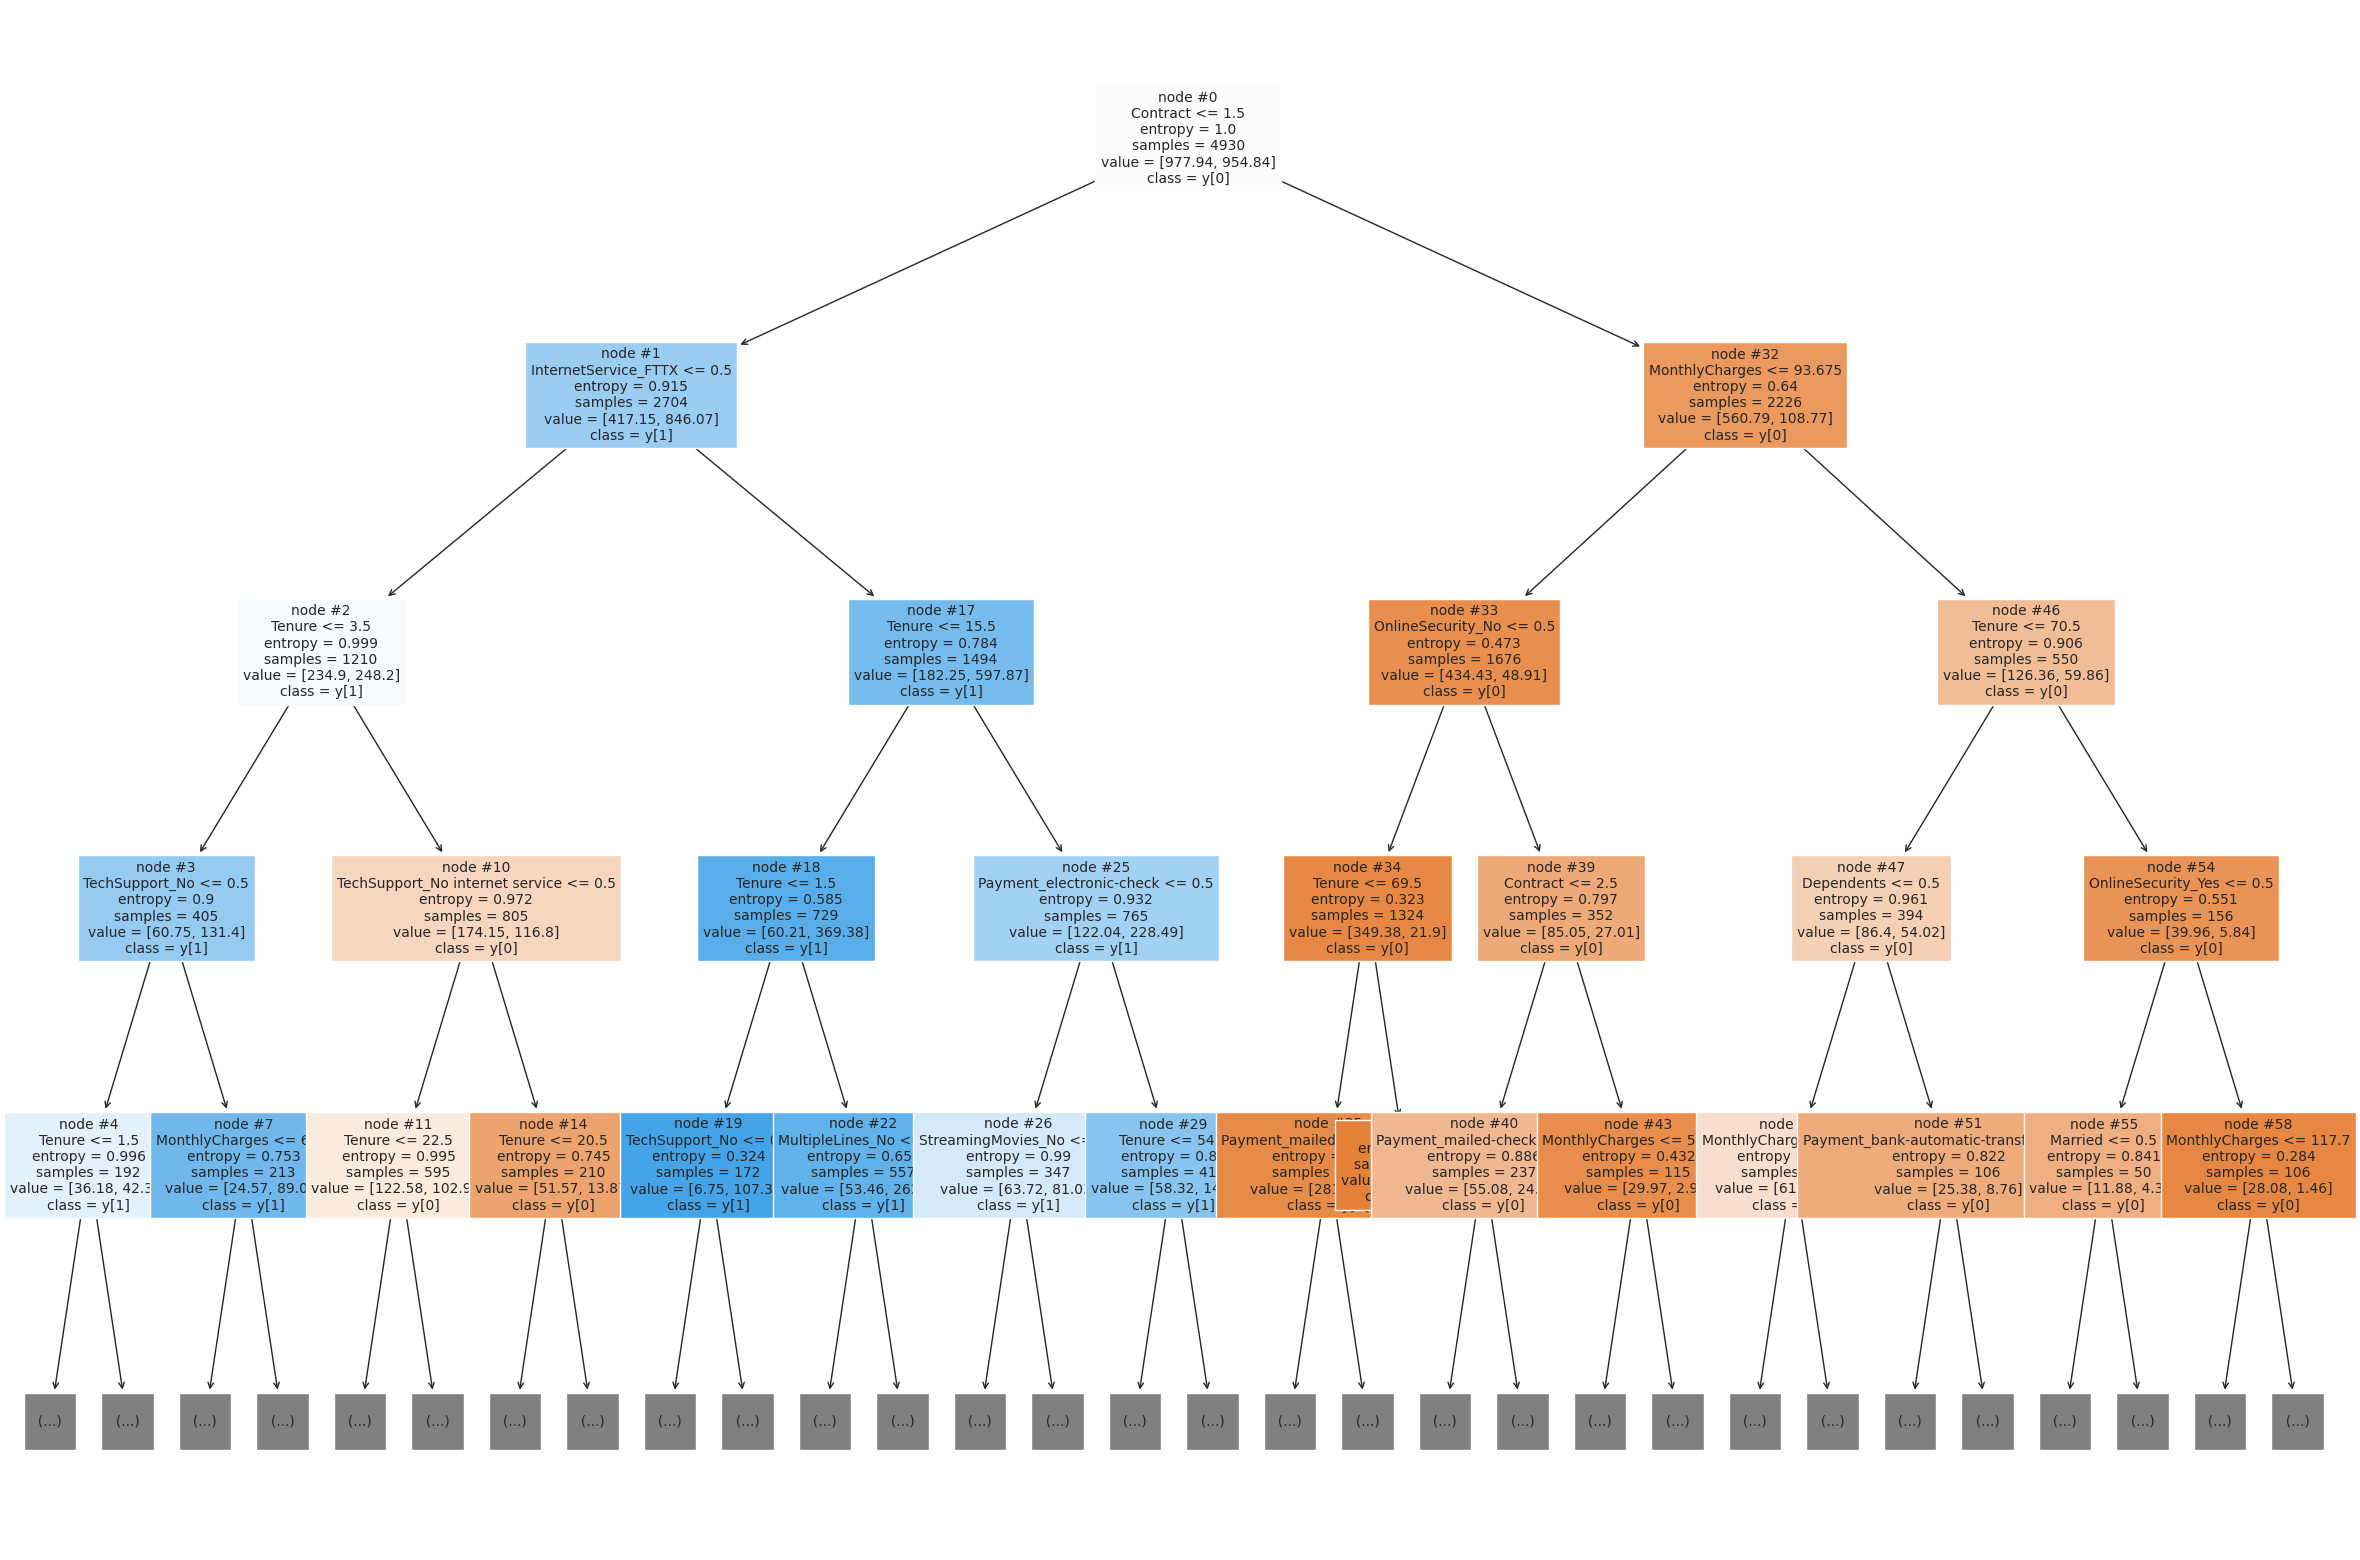

In [ ]:
features = list(X_train.columns)
plt.figure(figsize = (30, 20))
tree.plot_tree(dt_tunned, max_depth=4, feature_names=features, filled=True, fontsize=10, node_ids=True, class_names=True)
plt.show()

#### **Question (13)**

Update the bellow cell providing your observations on :
* The performance of the tunned decision tree
* The features importance
* The tree

#### **Response (13)**

**Observations**
1. The performance of the tunned decision tree:

The accuracy on both the training and test datasets is around 70%, indicating that the model is performing well, but we can improve it.
The precision for predicting "Not Churn" is relatively high, meaning that when the model predicts a customer will not churn, it's correct.
The recall for predicting "Churn" is high, indicating that the model is good at identifying customers who will churn.

2. The features importance :

The important features in this case are contract (as above), occupancy and Fiber Internet services.
These features contribute most to the model's predictions.

3. Tree :

The tree plot confirms the remarks made about the importance of variables. We also observe that for these 3 they have  a high entropy, wich indicates that the node are diverse and not well-separated in terms of their classes.

Let's try to fine tune multiple hyperparameters and see the results.

It's up to you to expirements multiple values to find the best paramaters.

<span style="color:#ff5f27;"> 👾 Uncomment and update the following cell code if required, cf `parameters` </span>

In [ ]:
# Choose the type of classifier
dt_tunned_hp = DecisionTreeClassifier(random_state=1, class_weight={0: 0.27, 1: 0.73}, criterion ='entropy')

# Grid of parameters to choose from
parameters = { 'criterion':['gini','entropy'],'max_depth': np.arange(5, 15)} #'max_features': np.arange(10, 20)

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
grid_obj = GridSearchCV(dt_tunned, parameters, scoring=scorer, cv=10)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
dt_tunned_hp = grid_obj.best_estimator_

# Fit the best algorithm to the data
dt_tunned_hp.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.27, 1: 0.73}, max_depth=5,
                       random_state=1)

               precision    recall  f1-score   support

Not Churn (0)     0.9259    0.6938    0.7932      3622
    Churn (1)     0.4995    0.8463    0.6283      1308

     accuracy                         0.7343      4930
    macro avg     0.7127    0.7701    0.7108      4930
 weighted avg     0.8128    0.7343    0.7495      4930



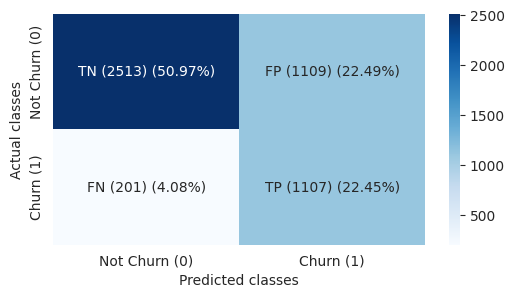

In [ ]:
# Checking performance of the tunned DT model on the training data
y_pred_train_dt_tunned = dt_tunned_hp.predict(X_train)
metrics_score(y_train, y_pred_train_dt_tunned)

               precision    recall  f1-score   support

Not Churn (0)     0.9051    0.6759    0.7739      1552
    Churn (1)     0.4727    0.8039    0.5954       561

     accuracy                         0.7099      2113
    macro avg     0.6889    0.7399    0.6846      2113
 weighted avg     0.7903    0.7099    0.7265      2113



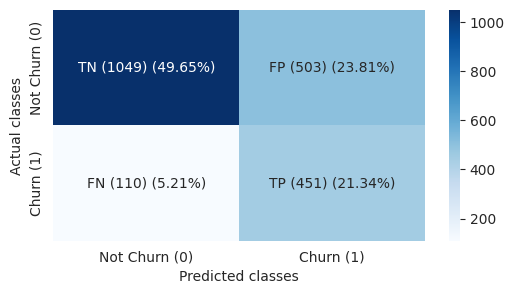

In [ ]:
# Checking performance ofthe DT tunned on the testing data
y_pred_test_dt_tunned = dt_tunned_hp.predict(X_test)
metrics_score(y_test, y_pred_test_dt_tunned)

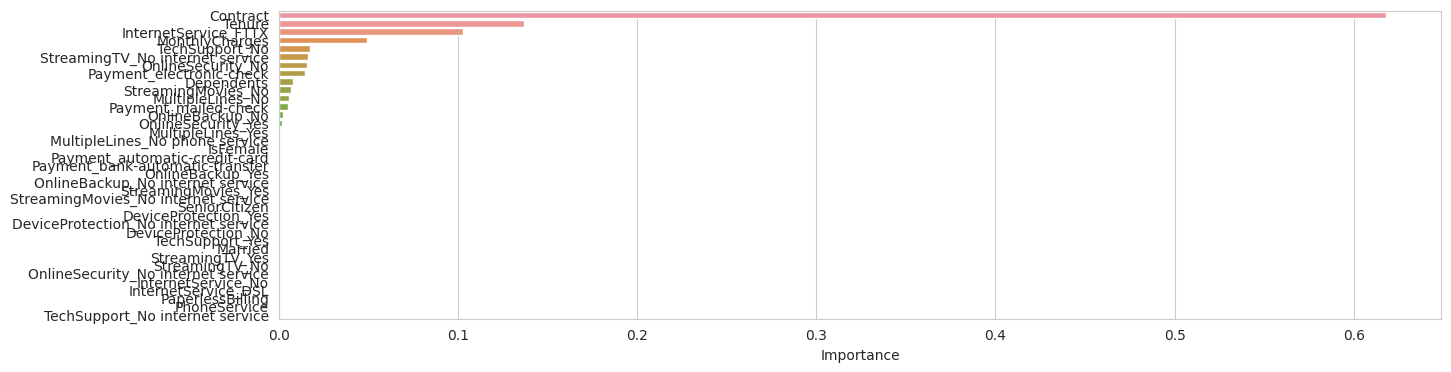

In [ ]:
# Plot the feature importance of the tunned model
importances = dt_tunned_hp.feature_importances_
columns = X_train.columns
importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
plt.figure(figsize = (15, 4))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)
plt.show()

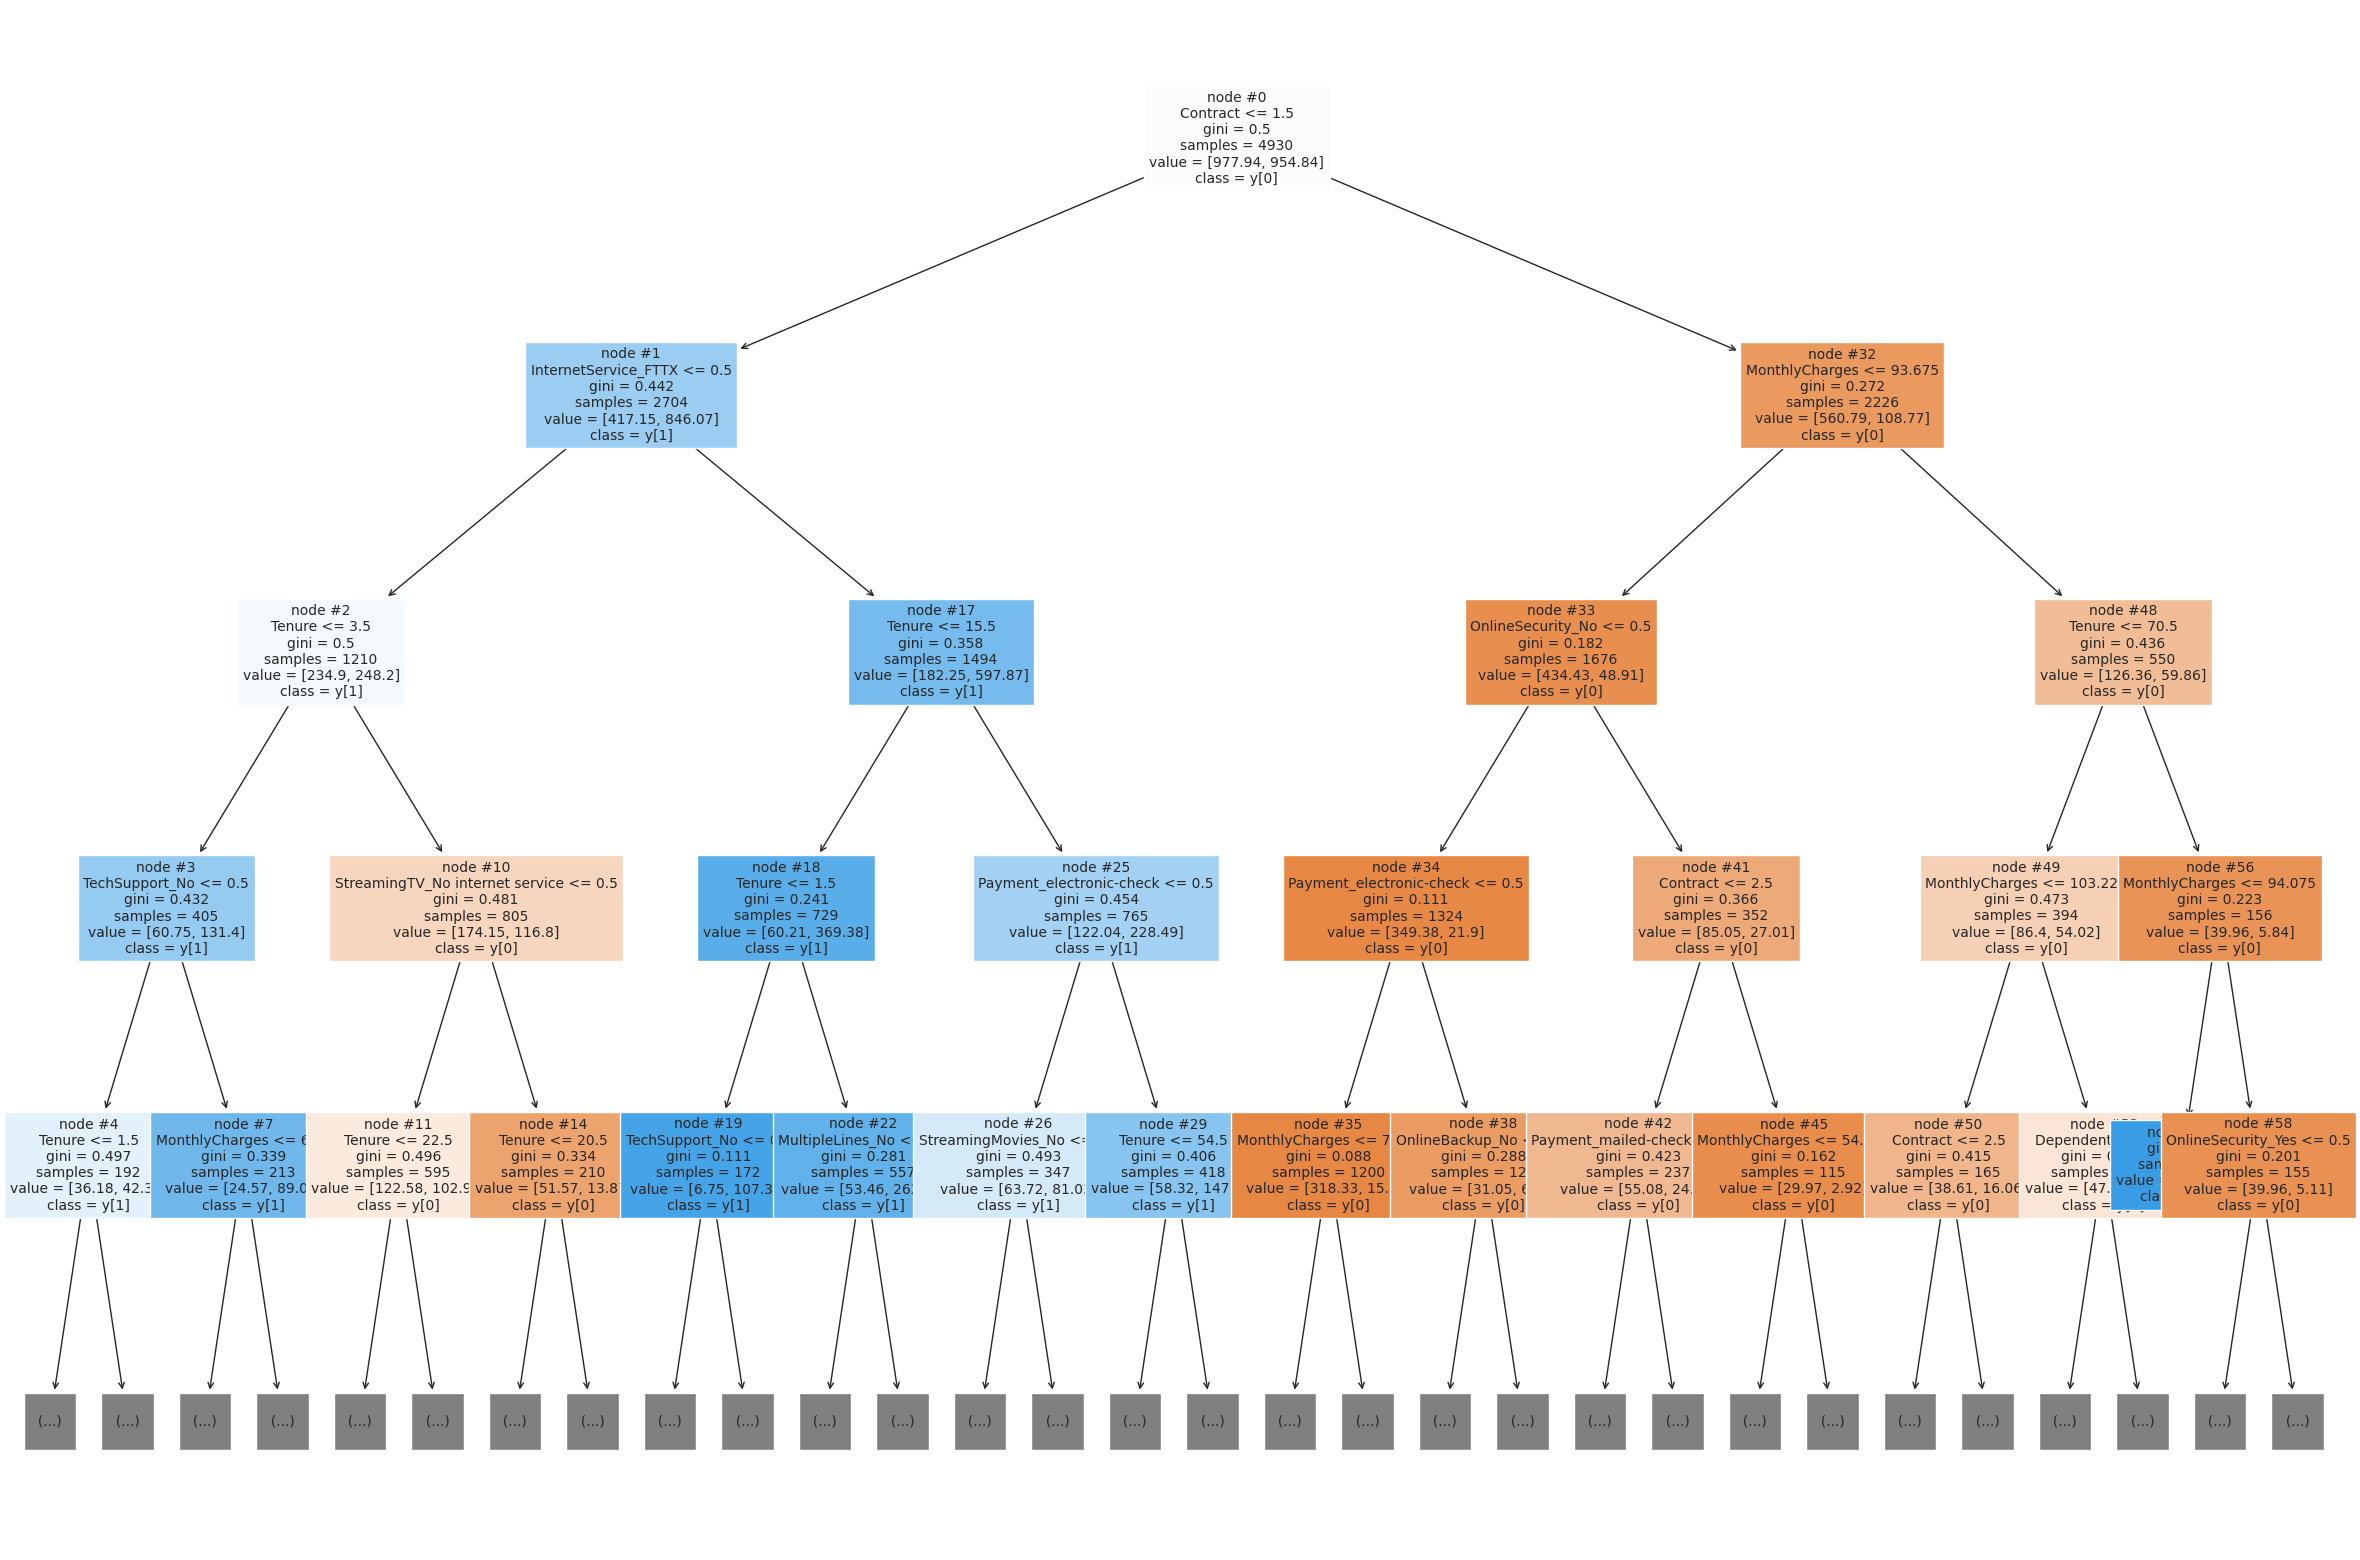

In [ ]:
features = list(X_train.columns)
plt.figure(figsize = (30, 20))
tree.plot_tree(dt_tunned_hp, max_depth=4, feature_names=features, filled=True, fontsize=10, node_ids=True, class_names=True)
plt.show()

#### **Question (14)**

Update the bellow cell providing your observations on :
* The performance of the tunned decision tree
* The features importance
* The tree

#### **Response (14)**

**Observations**
* Nothing changes

# **Neural Network**

## **Question (15)**

This is a bonus/optionnal question.

* Can apply a new approach to the problem using **ANN**
* Feel free with your imagination here

**Scaling the data**

The independent variables in this dataset have different scales. When features have different scales from each other, there is a chance that a higher weightage will be given to features that have a higher magnitude, and they will dominate over other features whose magnitude changes may be smaller but whose percentage changes may be just as significant or even larger. This will impact the performance of our machine learning algorithm, and we do not want our algorithm to be biased towards one feature.

The solution to this issue is **Feature Scaling**, i.e. scaling the dataset so as to give every transformed variable a comparable scale.

We will use the **Standard Scaler** method, which centers and scales the dataset using the Z-Score. It standardizes features by subtracting the mean and scaling it to have unit variance. The standard score of sample x is calculated as:

> **z = (x - u) / s**

where **u** is the mean of the training samples (zero) and **s** is the standard deviation of the training samples.

In [ ]:
# Scaling the data
sc = StandardScaler()

# Complete the code to scale the data

# Fit and transform the scaler on the training data #
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)

# Transform the test data #
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)


In [ ]:
X_train_scaled.head().T

,0,1,2,3,4
SeniorCitizen,-0.43815,2.28234,-0.43815,-0.43815,-0.43815
Married,-0.96296,-0.96296,1.03847,-0.96296,-0.96296
Dependents,-0.65086,-0.65086,-0.65086,-0.65086,-0.65086
Tenure,-1.11456,-1.19575,-1.19575,1.11837,-0.83037
PhoneService,0.33446,0.33446,0.33446,0.33446,0.33446
Contract,-0.83092,-0.83092,-0.83092,0.36757,-0.83092
PaperlessBilling,-1.20530,0.82967,0.82967,-1.20530,0.82967
MonthlyCharges,0.50485,0.72485,0.33779,0.51643,1.12349
InternetService_DSL,-0.72060,-0.72060,-0.72060,1.38774,-0.72060
InternetService_FTTX,1.12454,1.12454,1.12454,-0.88925,1.12454


In [ ]:
X_test_scaled.head().T

,0,1,2,3,4
SeniorCitizen,-0.43815,-0.43815,2.28234,-0.43815,-0.43815
Married,-0.96296,1.03847,-0.96296,-0.96296,1.03847
Dependents,-0.65086,1.53642,-0.65086,-0.65086,1.53642
Tenure,-0.58677,-0.99276,-0.50558,-0.50558,0.30640
PhoneService,0.33446,0.33446,0.33446,0.33446,0.33446
Contract,-0.83092,1.56605,-0.83092,1.56605,1.56605
PaperlessBilling,0.82967,-1.20530,0.82967,0.82967,-1.20530
MonthlyCharges,1.02921,-1.51814,1.11191,-1.49663,-1.49994
InternetService_DSL,-0.72060,-0.72060,-0.72060,-0.72060,-0.72060
InternetService_FTTX,1.12454,-0.88925,1.12454,-0.88925,-0.88925


In [ ]:
# Initializing the ANN
model = Sequential()

# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(activation='relu', input_dim=X_train_scaled.shape[1], units=(X_train_scaled.shape[1]+1) // 2))

# Add 1st hidden layer
model.add(Dense(units=(X_train_scaled.shape[1]+1) // 2, activation='relu'))

# Adding the output layer
# Notice that we do not need to specify input dim.
# we have an output of 1 node, which is the the desired dimensions of our output (Churn or Not)
# We use the **** because we want probability outcomes
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 19)                722       
                                                                 
 dense_7 (Dense)             (None, 19)                380       
                                                                 
 dense_8 (Dense)             (None, 1)                 20        
                                                                 
Total params: 1,122
Trainable params: 1,122
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train_scaled,
                    y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32,
                    verbose=1)

Epoch 1/50
124/124 [==============================] - 1s 4ms/step - loss: 0.5276 - accuracy: 0.7312 - val_loss: 0.4721 - val_accuracy: 0.7779
Epoch 2/50
124/124 [==============================] - 0s 2ms/step - loss: 0.4433 - accuracy: 0.7890 - val_loss: 0.4535 - val_accuracy: 0.7708
Epoch 3/50
124/124 [==============================] - 0s 2ms/step - loss: 0.4264 - accuracy: 0.7994 - val_loss: 0.4458 - val_accuracy: 0.7819
Epoch 4/50
124/124 [==============================] - 0s 2ms/step - loss: 0.4193 - accuracy: 0.8063 - val_loss: 0.4427 - val_accuracy: 0.7830
Epoch 5/50
124/124 [==============================] - 0s 2ms/step - loss: 0.4144 - accuracy: 0.8060 - val_loss: 0.4416 - val_accuracy: 0.7759
Epoch 6/50
124/124 [==============================] - 0s 2ms/step - loss: 0.4114 - accuracy: 0.8081 - val_loss: 0.4388 - val_accuracy: 0.7819
Epoch 7/50
124/124 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8126 - val_loss: 0.4446 - val_accuracy: 0.7830
Epoch 

67/67 [==============================] - 0s 1ms/step - loss: 3.2332 - accuracy: 0.6176


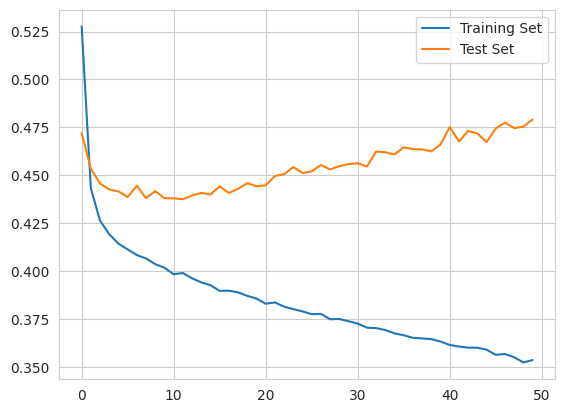

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("Training Set" , "Test Set") , loc =0)

#Printing results
results = model.evaluate(X_test, y_test)

67/67 [==============================] - 0s 1ms/step
Best Threshold=0.993682, G-Mean=0.736


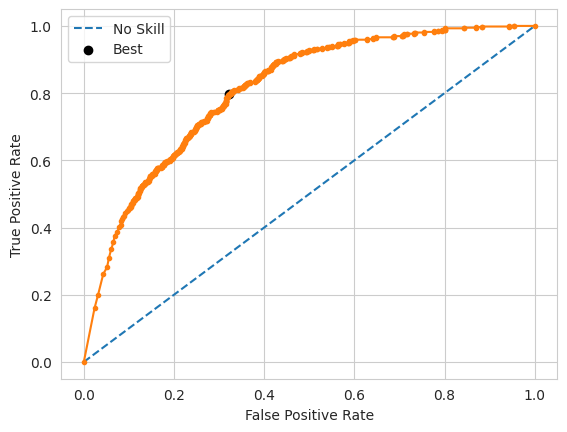

In [ ]:
# predict probabilities
yhat = model.predict(X_test)

# keep probabilities for the positive outcome only
yhat = yhat[:, 0]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))

# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

67/67 [==============================] - 0s 1ms/step
               precision    recall  f1-score   support

Not Churn (0)     0.9016    0.6791    0.7747      1552
    Churn (1)     0.4725    0.7950    0.5927       561

     accuracy                         0.7099      2113
    macro avg     0.6870    0.7371    0.6837      2113
 weighted avg     0.7877    0.7099    0.7264      2113



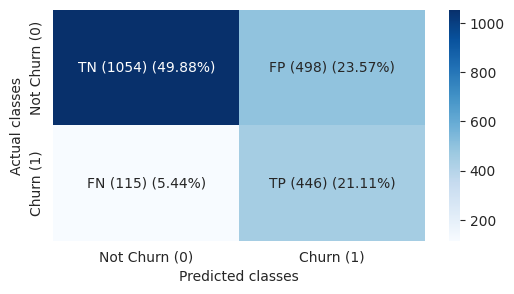

In [ ]:
y_pred_test = model.predict(X_test)
y_pred_test = (y_pred_test > thresholds[ix])
metrics_score(y_test, y_pred_test)